In [2]:
import pandas as pd
import random
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats as st
from datetime import datetime, timedelta
import plotly.express as px
from plotly import graph_objects as go
import math as mth
import statistics as stat
import phik
import warnings

In [3]:
warnings.filterwarnings("ignore")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sn.set(style="ticks", rc=custom_params)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Общая-информация" data-toc-modified-id="Общая-информация-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Общая информация</a></span></li><li><span><a href="#Предобработка" data-toc-modified-id="Предобработка-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка</a></span><ul class="toc-item"><li><span><a href="#Наименования-столбцов" data-toc-modified-id="Наименования-столбцов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Наименования столбцов</a></span></li><li><span><a href="#Дубликаты" data-toc-modified-id="Дубликаты-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Дубликаты</a></span></li><li><span><a href="#Пропуски" data-toc-modified-id="Пропуски-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Пропуски</a></span><ul class="toc-item"><li><span><a href="#Возраст" data-toc-modified-id="Возраст-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Возраст</a></span></li><li><span><a href="#Баланс" data-toc-modified-id="Баланс-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Баланс</a></span></li></ul></li><li><span><a href="#Прочее" data-toc-modified-id="Прочее-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Прочее</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ" data-toc-modified-id="Исследовательский-анализ-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ</a></span><ul class="toc-item"><li><span><a href="#Исследование-аномалий" data-toc-modified-id="Исследование-аномалий-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Исследование аномалий</a></span></li><li><span><a href="#Графики" data-toc-modified-id="Графики-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Графики</a></span><ul class="toc-item"><li><span><a href="#Общие-графики" data-toc-modified-id="Общие-графики-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Общие графики</a></span></li><li><span><a href="#Клиенты-с-ЗП-до-200-тысяч" data-toc-modified-id="Клиенты-с-ЗП-до-200-тысяч-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Клиенты с ЗП до 200 тысяч</a></span></li><li><span><a href="#Клиенты-с-ЗП-свыше-200-тысяч" data-toc-modified-id="Клиенты-с-ЗП-свыше-200-тысяч-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Клиенты с ЗП свыше 200 тысяч</a></span></li></ul></li><li><span><a href="#Таблица-корреляции" data-toc-modified-id="Таблица-корреляции-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Таблица корреляции</a></span></li></ul></li><li><span><a href="#Статистический-анализ" data-toc-modified-id="Статистический-анализ-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Статистический анализ</a></span><ul class="toc-item"><li><span><a href="#Гипотеза-о-равенстве-дохода" data-toc-modified-id="Гипотеза-о-равенстве-дохода-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Гипотеза о равенстве дохода</a></span></li><li><span><a href="#Гипотеза-о-равенстве-кредитного-рейтинга" data-toc-modified-id="Гипотеза-о-равенстве-кредитного-рейтинга-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Гипотеза о равенстве кредитного рейтинга</a></span></li></ul></li><li><span><a href="#Сегментирование-клиентов" data-toc-modified-id="Сегментирование-клиентов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Сегментирование клиентов</a></span></li><li><span><a href="#Подведение-итогов" data-toc-modified-id="Подведение-итогов-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Подведение итогов</a></span><ul class="toc-item"><li><span><a href="#Рекомендации-по-сегментам" data-toc-modified-id="Рекомендации-по-сегментам-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Рекомендации по сегментам</a></span></li><li><span><a href="#Презентация" data-toc-modified-id="Презентация-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Презентация</a></span></li></ul></li></ul></div>

<font color='Black' size=+1><b>Анализ оттока клиентов банка</b></font><br>

Мы работаем аналитиками в "Метанпромбанке". У нас в работе оказалась база 10 тысяч клиентов банка с данными о них. В базе присутствуют текущие и ушедшие клиенты. Отдел маркетинга попросил изучить их на предмет склонности к уходу из банка и выделить наиболее рисковые сегменты.

Ключевые задачи:

- Изучить датасет, при необходимости устранить ошибки, неточности и пропуски;
- Найти связь между признаками клиентов и их оттоком. Показать зависимости на графиках;
- Выделить сегменты клиентов, которые склонны отказаться от услуг банка;
- Сформулировать рекомендации для заказчика.


**План работы:**

1 этап. Общая информация о датасете. 
- Изучим базовую информацию о данных;
- Получим данные о столбцах, кол-ве значений и типах данных;
---------------------
2 этап. Предобработка данных. 
- Изучим датасеты, обозначим проблемы в данных;
- Приведём в соответствие типы данных;
- При необходимости устраним дублирующиеся значения, пропуски и прочие недостатки;
--------------------- 
3 этап. Исследовательский анализ данных.  
- Исследуем различные признаки клиентов и их распределение по базе;
- Сравним портреты типичных клиентов на таблицах и графиках;
- Посчитаем уровни оттока по разным категориям клиентов;
- Проведём корреляционный анализ влияния признаков на отток клиентов;
--------------------- 
4 этап. Проверка статистических гипотез 
- Сформулируем и проверим статистические гипотезы;
----------------------
5 этап. Сегментация на основе стратегических показателей
- Опишем значимые признаки отточности клиентов;
- На основе сочетаниий признаков выделим наиболее отточные группы клиентов;
- Рассчитаем размеры групп и процент оттока;
-----------------------
6 этап. Выводы и рекомендации
- Подведём итоги исследования;
- Дадим рекомендации отделу маркетинга;
- Подготовим презентацию по итогам.
-----------------------



## Общая информация

In [4]:
try:
    df = pd.read_csv('H://Jupiter/bank_scrooge.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')

In [5]:
def df_info(df):
    display(df.head())
    print()
    display(df.info())
    print()
    display(df.isna().sum())
    print()
    print('Кол-во полных дубликатов:', df.duplicated().sum())

In [6]:
df_info(df)

USERID  score       city gender   age  equity     balance  products  \
0  183012  850.0    Рыбинск      Ж  25.0       1    59214.82         2   
1  146556  861.0    Рыбинск      Ж  37.0       5   850594.33         3   
2  120722  892.0    Рыбинск      Ж  30.0       0         NaN         1   
3  225363  866.0  Ярославль      Ж  51.0       5  1524746.26         2   
4  157978  730.0  Ярославль      М  34.0       5      174.00         1   

   credit_card  last_activity  EST_SALARY  churn  
0            0              1    75719.14      1  
1            1              0    86621.77      0  
2            1              1   107683.34      0  
3            0              1   174423.53      1  
4            1              0    67353.16      1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


None

USERID              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
EST_SALARY          0
churn               0
dtype: int64


Кол-во полных дубликатов: 0


**Вывод по разделу:**

Ключевая информация по нашему датасету:
- В нём 10 000 строк, 12 столбцов;
- 26 пропусков в столбце `'age'` и 2295 пропусков в `'balance'`;
- Необходимо привести в "змеиный" стиль названия столбцов;
- Дубликаты строк отсутствуют.

## Предобработка

На этапе предобработки нам нужно:

- Подготовить столбцы со строчными значениями к анализу;
- Привести наименования столбцов в надлежащий вид;
- Проверить базы на наличие дубликатов и пропусков;

### Наименования столбцов

Приведём столбцы к нижнему регистру и переименуем столбец `'userid'` в `'user_id'`

In [7]:
df.columns = df.columns.str.lower()
df = df.rename(columns = {'userid':'user_id'})

### Дубликаты

Полных дубликатов в датасете нет. Нам необходимо проверить два поля, где могут встретиться явные и неявные дубликаты - это `'user_id'` и `'city'`. 

___________________

**Города**

Проверим уникальные значения в столбце `'city'`:

In [8]:
df['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

Задвоенных значений нет. В конце раздела предобработки мы переведём данные о городах в бинарный тип для дальнейшего анализа.

**Пользователи**

Сделаем срез по пользователям с задвоенными ID:

In [9]:
dups = df.loc[df.duplicated(subset='user_id', keep=False)].sort_values(by='user_id')
dups.head(5)

user_id  score       city gender   age  equity     balance  products  \
1893   116540  883.0    Рыбинск      Ж  55.0       1   362756.49         3   
7694   116540  887.0  Ярославль      Ж  38.0       0         NaN         1   
7542   117943  880.0  Ярославль      Ж  40.0       0         NaN         1   
4866   117943  855.0    Рыбинск      Ж  32.0       6  1036832.93         4   
5896   120258  905.0  Ярославль      М  30.0       0         NaN         1   

      credit_card  last_activity  est_salary  churn  
1893            0              1   175920.48      1  
7694            0              1   119247.61      0  
7542            1              0   137718.93      0  
4866            1              1   107792.71      1  
5896            1              1   146427.96      0

In [10]:
dups['city'].value_counts()

Рыбинск      73
Ярославль    73
Name: city, dtype: int64

**Наблюдения:**

- Клиенты с задвоенным ID отличаются по многим признакам - от возраста и пола до городов и зарплат. Вряд ли это одни и те же клиенты, заведённые в систему дважды. 
- Города в списке задвоенных разделились поровну. Вероятно, в одном из городов случился обрыв связи с основным сервером, и в течение короткого периода программа присваивала номера новым клиентам без оглядки на общую базу. 
- Задвоенных не очень много - скорее всего, проблему быстро обнаружили и устранили. 

Можно сделать вывод, что дубликаты - это разные клиенты, которым по технической ошибке присвоили один и тот же номер, но в разных городах. 

___________________

У нас два варианта:
- Удалить их;
- Сохранить, изменив значение user_id в задвоенных. Например, прибавив единицу.

В первом варианте мы не знаем, какую строку из задвоенных удалять. У нас нет даты, времени создания либо иных значений, от которых мы могли бы оттолкнуться. В каком-то смысле их значимость для нас одинакова.   

___________________

Выберем второй вариант и сохраним данные. Изменение ID произойдёт только в нашей тетрадке, на анализ и исходную базу данных это никак не повлияет. Мы сохраним 1.5% данных - немного, но если есть возможность оставить их, то стоит попытаться.

Воспользуемся тем фактом, что города распределены поровну среди дубликатов. Выберем один из них и поменяем `'user_id'` в оригинальном датасете. Чтобы гарантированно не получить новых дубликатов, каждому следующему клиенту будем присваивать ID на единицу больше максимального в датасете. 

In [11]:
for i in dups.query('city == "Рыбинск"').index:
    df.loc[i,'user_id'] = df['user_id'].max() + 1

print('Кол-во дубликатов по user_id:', len(df.loc[df.duplicated(subset='user_id', keep=False)].sort_values(by='user_id')))

Кол-во дубликатов по user_id: 0


Дубликаты устранены без потери данных.

### Пропуски

In [12]:
df.isna().sum()

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

#### Возраст

Посмотрим на срез таблицы с пропусками в столбце с возрастом:

In [13]:
df[df['age'].isna()].sample(5)

user_id  score       city gender  age  equity     balance  products  \
7236   229196  908.0    Рыбинск      Ж  NaN       4  1120340.31         3   
8449   210898  805.0  Ярославль      Ж  NaN       0         NaN         1   
9457   141945  929.0  Ярославль      М  NaN       0         NaN         1   
2165   229182  692.0    Рыбинск      Ж  NaN       0         NaN         1   
1247   228075  932.0  Ярославль      М  NaN       5  7601719.20         2   

      credit_card  last_activity  est_salary  churn  
7236            1              1    85002.15      0  
8449            0              1   922080.25      0  
9457            1              0   381868.89      0  
2165            1              1   160368.82      0  
1247            1              1   408121.16      0

Пропуски в этом поле можно отнести к полностью случайным: они не связаны с остальными данными. Рассчитать и предсказать значения в этих ячейках будет сложно. Таких строк совсем мало, поэтому удалим их из базы:

In [14]:
df = df.dropna(subset=['age']).reset_index(drop=True)

#### Баланс

В столбце с балансом 2295 пропусокв. Нам необходимо разобраться в их природе и понять, чем они являются на самом деле:
- Нулём
- Ошибкой выгрузки
- Запланированным значением ячейки при выполнении некоторых условий

Посмотрим на срез таблицы с пропусками в столбце с балансом:

In [15]:
df.query('balance.isna()').sample(10)

user_id  score       city gender   age  equity  balance  products  \
1363   121268  895.0  Ярославль      М  52.0       0      NaN         1   
3825   196234  951.0    Рыбинск      Ж  40.0       0      NaN         1   
5908   129817  657.0    Рыбинск      М  42.0       0      NaN         1   
8724   123313  944.0  Ярославль      М  31.0       0      NaN         1   
9615   156043  724.0  Ярославль      М  34.0       0      NaN         1   
9439   118329  967.0  Ярославль      Ж  29.0       0      NaN         2   
1157   222504  920.0    Рыбинск      М  27.0       0      NaN         1   
6840   161547  653.0  Ярославль      М  45.0       0      NaN         1   
5149   126492  891.0     Ростов      Ж  66.0       0      NaN         1   
386    136697  907.0    Рыбинск      М  42.0       0      NaN         1   

      credit_card  last_activity  est_salary  churn  
1363            1              0   141417.87      0  
3825            1              0   805820.73      0  
5908            1              1   156697.38      0  
8724            1              1   543466.98      0  
9615            1              1   380869.25      0  
9439            1              0   181572.90      0  
1157            1              0   177117.43      0  
6840            1              1   190422.99      0  
5149            1              1    98762.73      0  
386             1              0   209744.16      0

**Наблюдения:**

- Из 10 случайных клиентов большинство владеет кредитной картой банка;
- У многих из них это единственный продукт банка;
- Количество баллов собственности чаще всего равно нулю.

___________________

Проверим наши предположения на графиках. Построим гистограммы по ключевым столбцам для клиентов из двух групп:
- с пропусками в балансе;
- без пропусков;

Дополнительно посчитаем кол-во клиентов с кредитными картами и пропуском в балансе.

Гистограммы клиентов с пропусками в balance


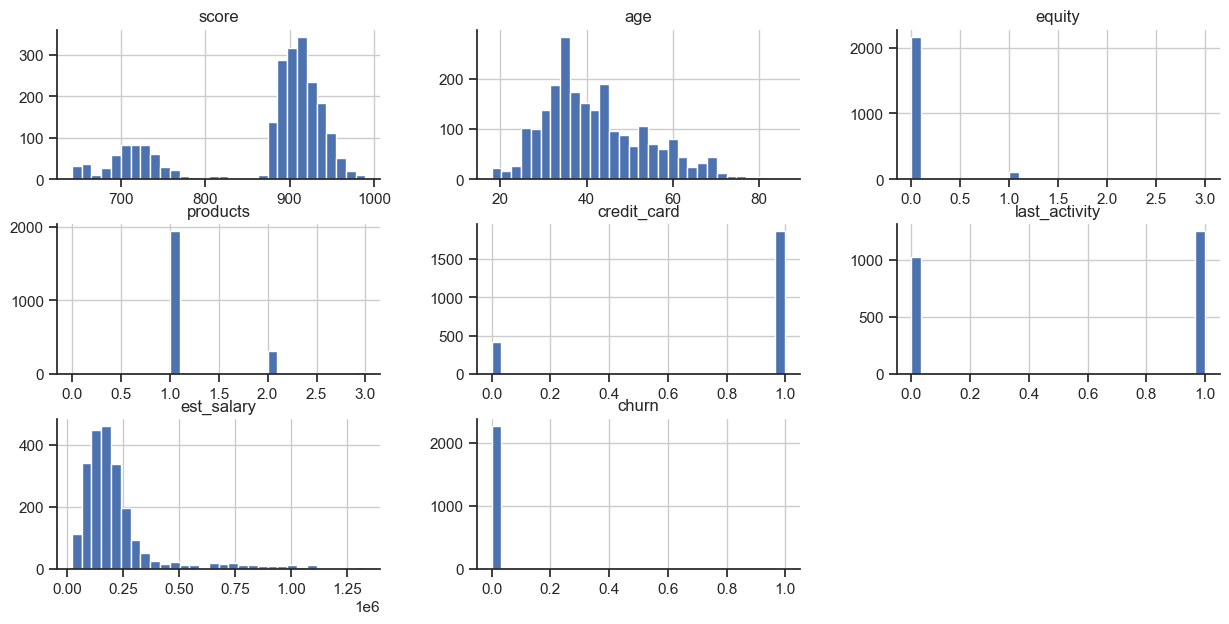

In [16]:
lst = ['score', 'gender', 'age', 'equity', 'products', 'credit_card', 'last_activity', 'est_salary','churn']
print('Гистограммы клиентов с пропусками в balance')
df.query('balance.isna()').loc[:, lst].hist(bins=30, figsize=(15,7));

Гистограммы клиентов без пропусков


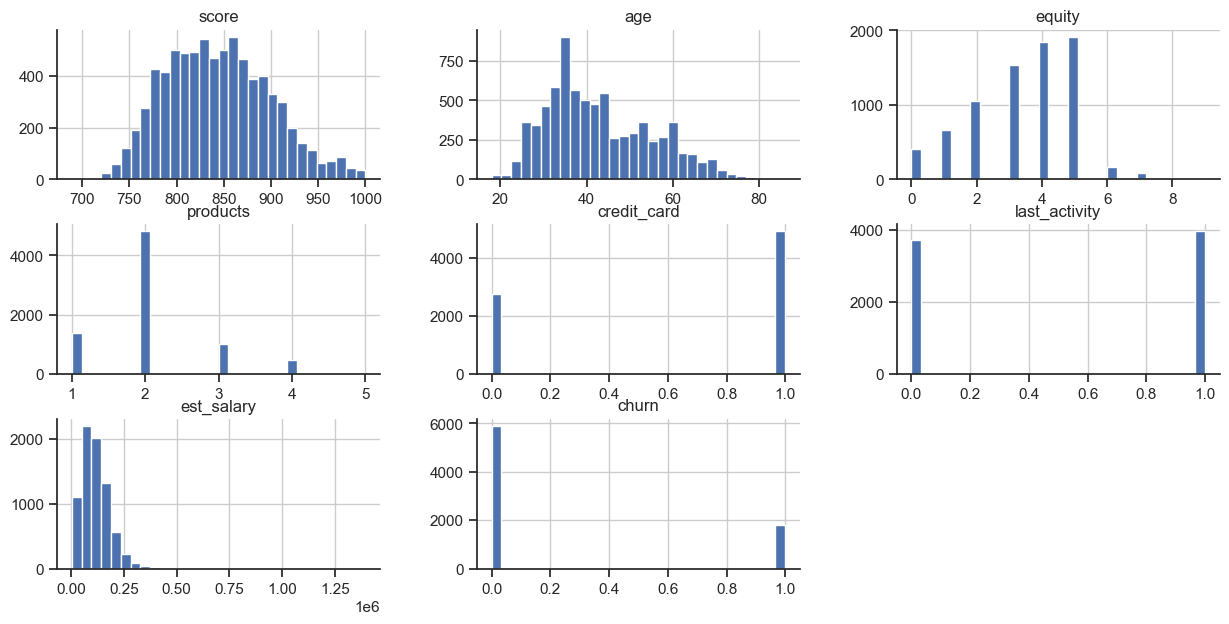

In [17]:
print('Гистограммы клиентов без пропусков')
df.query('~balance.isna()').loc[:, lst].hist(bins=30, figsize=(15,7));

In [18]:
print('Клиентов с кредитной картой и пропуском в балансе:',len(df.query('(credit_card == 1) and (balance.isna())')))
print('Клиентов с нулевым балансом:',len(df.query('(balance == 0)')))

Клиентов с кредитной картой и пропуском в балансе: 1858
Клиентов с нулевым балансом: 2


**Наблюдения:**

- Большинство клиентов с пропуском в балансе - действительно владельцы кредитных карт, которые являются единственным продуктом банка для этих клиентов. Тем не менее, они составляют не 100% от всех пропусков;
- У большинства клиентов с пропусками в балансе - ноль баллов собственности;
- В базе есть клиенты с нулём на счету. Это значит, что нулевой баланс и пропуск - не тождественны. У пропуска иное значение;
- У клиентов с пропуском в балансе есть заметный "хвост" пониженного кредитного рейтинга. 

- *Прочее:* в базе присутствуют записи клиентов с нулём продуктов, что является явной ошибкой. Запомним это и разберёмся позднее.

___________________

**Промежуточный вывод:**

Мы можем сделать вывод, что пропуски у 1858 клиентов не случайны и могут быть обусловлены настройками заполнения базы - кредитная карта не подразумевает положительного баланса, при этом у большинства этих клиентов она является единственным продуктом банка. Поэтому вместо "минуса" систмема оставляет пропуск в ячейке. 

Для нас имеют большое значение данные в других столбцах у этих клиентов, поэтому мы не можем их удалить. Заполнять их иным значением - заглушкой или расчётным значением также будет некорректно

___________________

Осталось разобраться с оставшимися пропусками в балансе - у 437 клиентов без кредитных карт. Построим для них такие же гистограммы:

Гистограммы клиентов с пропусками в balance и без кр.карт


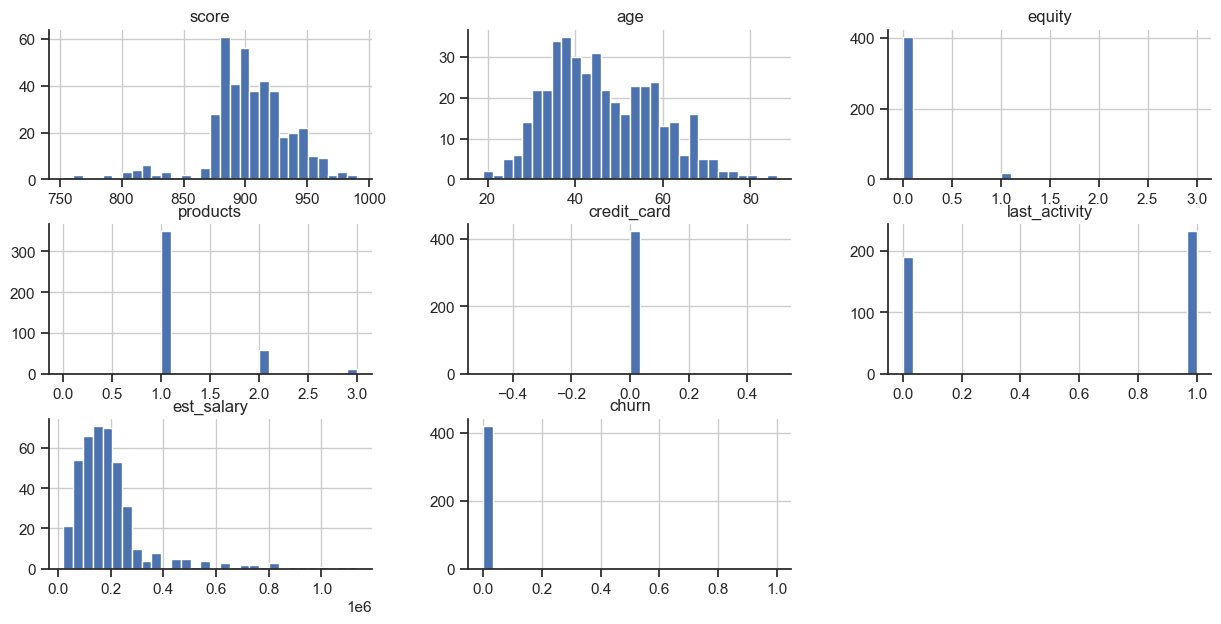

In [19]:
print('Гистограммы клиентов с пропусками в balance и без кр.карт')
df.query('(credit_card == 0) and (balance.isna())').loc[:, lst].hist(bins=30, figsize=(15,7));

**Наблюдения:**

Есть некоторое сходство с графиками владельцев кредитных карт:
- Также виден "хвост" пониженного кредитного рейтинга;
- У большинства клиентов с пропусками в балансе - ноль баллов собственности и лишь один продукт в банке (за редким исключением);
- Показатель оттока как и в случае с кредитными картами - почти нулевой. Никто из этих клиентов не собирается уходить.

Вероятнее всего, эти записи принадлежат клиентам с обычными потребительскими кредитами. Не всегда для их оформления требуется информация об имуществе, равно как и нет необходимости открывать дебетовые карты или иные продукты и счета.  Низкий показатель оттока тоже понятен - клиент не уйдёт пока не погасит кредит полностью. 

___________________

**Вывод:**

Характер этих пропусков совпадает с таковыми у владельцев кредитных карт - нулевой или положительный баланс для кредитных клиентов не предусмотрен системой. Удалять или изменять эти строки мы также не будем.

### Прочее

Ранее мы выяснили, что в базе присутствуют строки с нулём банковских продуктов:

In [20]:
df.query('products == 0')

user_id  score     city gender   age  equity  balance  products  \
8939   147837  962.0  Рыбинск      Ж  79.0       3      NaN         0   

      credit_card  last_activity  est_salary  churn  
8939            0              0    25063.96      1

Такая строка лишь одна. Если у человека нет открытых продуктов в банке, то мы уже не можем считать его клиентом. 
Эту строку следует удалить:

In [21]:
df = df.drop(labels = 8939,axis = 0)

**Города**

В столбце `'city'` содержатся категориальные данные, которые в текущем виде будет сложно анализировать. Представим эти данные в бинарном виде и добавим столбцы с соответствующими значениями для каждого города:

In [22]:
dummies = pd.get_dummies(df['city'], prefix='city')
df = df.join(dummies)

**Вывод по разделу:**

In [23]:
display(df.head())
display(df.info())

user_id  score       city gender   age  equity     balance  products  \
0   183012  850.0    Рыбинск      Ж  25.0       1    59214.82         2   
1   146556  861.0    Рыбинск      Ж  37.0       5   850594.33         3   
2   120722  892.0    Рыбинск      Ж  30.0       0         NaN         1   
3   225363  866.0  Ярославль      Ж  51.0       5  1524746.26         2   
4   157978  730.0  Ярославль      М  34.0       5      174.00         1   

   credit_card  last_activity  est_salary  churn  city_Ростов  city_Рыбинск  \
0            0              1    75719.14      1            0             1   
1            1              0    86621.77      0            0             1   
2            1              1   107683.34      0            0             1   
3            0              1   174423.53      1            0             0   
4            1              0    67353.16      1            0             0   

   city_Ярославль  
0               0  
1               0  
2               0  
3               1  
4               1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9973 entries, 0 to 9973
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         9973 non-null   int64  
 1   score           9973 non-null   float64
 2   city            9973 non-null   object 
 3   gender          9973 non-null   object 
 4   age             9973 non-null   float64
 5   equity          9973 non-null   int64  
 6   balance         7695 non-null   float64
 7   products        9973 non-null   int64  
 8   credit_card     9973 non-null   int64  
 9   last_activity   9973 non-null   int64  
 10  est_salary      9973 non-null   float64
 11  churn           9973 non-null   int64  
 12  city_Ростов     9973 non-null   uint8  
 13  city_Рыбинск    9973 non-null   uint8  
 14  city_Ярославль  9973 non-null   uint8  
dtypes: float64(4), int64(6), object(2), uint8(3)
memory usage: 1.3+ MB


None

Предобработка завершена:
- Проверили базу на наличие дубликатов;
- Проанализировали пропуски в данных: удалено 27 строк с пропусками;
- Прочие пропуски в базе носят технический характер и не подлежат удалению/изменению. 
- Добавили три столбца с бинарной кодировкой категориальных данных поля `'city'`.

## Исследовательский анализ

In [24]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sn.set(style="ticks", rc=custom_params)

- Исследуем различные признаки клиентов и их распределение по базе;
- Сравним портреты типичных клиентов на таблицах и графиках;
- Посчитаем уровни оттока по разным категориям клиентов;
- Проведём корреляционный анализ влияния признаков на отток клиентов;

### Исследование аномалий
Перед началом исследовательского анализа проведём мини-анализ небулевых полей на наличие аномалий. Выведем таблицу с ключевыми статистиками по этим столбцам:

In [25]:
df[['score', 'balance', 'equity', 'products', 'est_salary']].describe()

score       balance       equity     products    est_salary
count  9973.000000  7.695000e+03  9973.000000  9973.000000  9.973000e+03
mean    848.671212  8.272456e+05     2.630803     1.871653  1.477991e+05
std      65.393153  1.980327e+06     1.980060     0.792547  1.392871e+05
min     642.000000  0.000000e+00     0.000000     1.000000  2.546300e+03
25%     802.000000  2.956987e+05     0.000000     1.000000  7.525202e+04
50%     853.000000  5.242953e+05     3.000000     2.000000  1.196431e+05
75%     900.000000  9.800512e+05     4.000000     2.000000  1.745000e+05
max    1000.000000  1.191136e+08     9.000000     5.000000  1.395064e+06

В базе есть клиенты с неправдоподобно низкими заработными платами. Будем исходить из того, что на законодательном уровне установлен МРОТ, и зарплата не может быть ниже него. В Ярославской области в 2023 году он равен 16 242 рублей. Присвоим это значение всем клиентам, у которых заработная плата в системе ниже этого уровня:

In [26]:
print('Будет изменено строк с зарплатой:', len(df.query('est_salary < 16242')))

for i in df.query('est_salary < 16242').index:
    if df.loc[i, 'est_salary'] < 16242:
        df.loc[i, 'est_salary'] = 16242
    else:
        pass

Будет изменено строк с зарплатой: 80


Маленькие заработные платы исправлены. Теперь построим диаграмму размаха для каждого из указанных ранее столбцов:

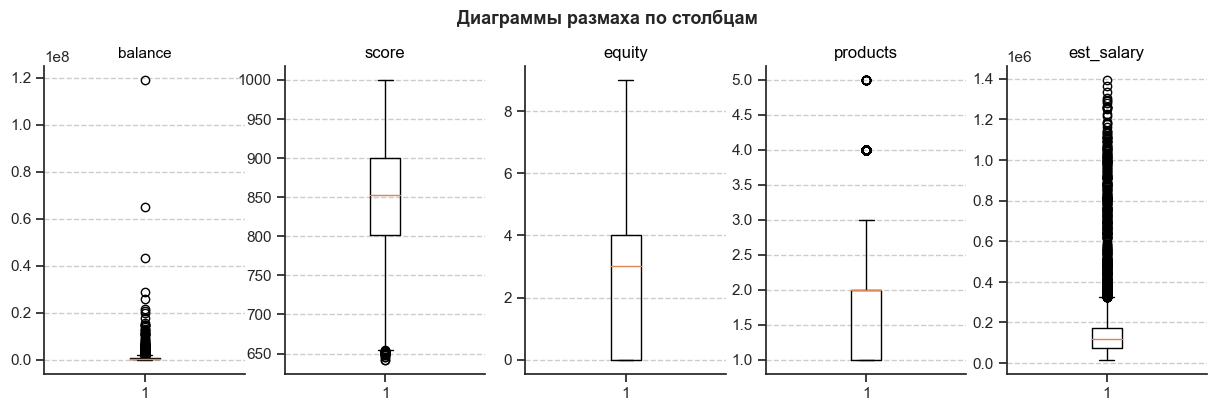

In [27]:
cat = pd.Series(['score', 'equity', 'products', 'est_salary'])
fig, ax = plt.subplots(1,5, figsize=(15, 4))
fig.suptitle('Диаграммы размаха по столбцам', y=1.02, fontsize=13, weight='bold')
#plt.xlim(0,5.5);

ax[0].boxplot(x='balance', data=df[~df['balance'].isna()], vert=True)
ax[0].set_title('balance', fontsize = 11, color = 'Black')
ax[0].grid(visible=True, which='major', axis='y', ls='--')

for x in cat.index:
    ax[x+1].boxplot(x=cat[x], data=df, vert=True)
    ax[x+1].set_title(cat[x], fontsize = 12, color = 'Black')
    ax[x+1].grid(visible=True, which='major', axis='y', ls='--')


В балансе и зарплатах наблюдается большое кол-во выбросов, но по графику неясно, существует ли между ними связь. 
Построим диаграмму рассеивания для этой пары столбцов:

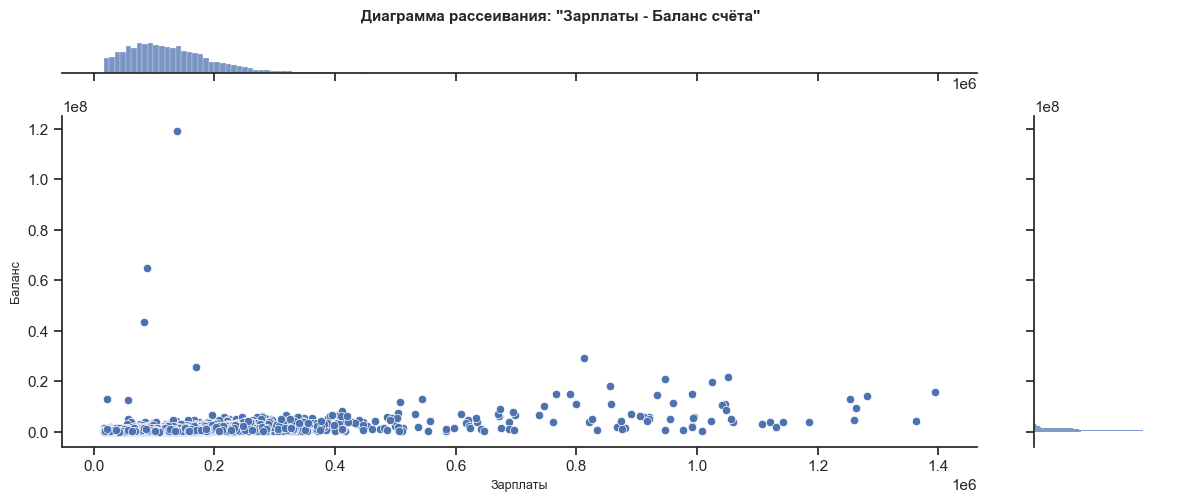

In [28]:
crit_joint = sn.jointplot(
    data=df, 
    y='balance', 
    x='est_salary'
)

crit_joint.set_axis_labels('Зарплаты', 'Баланс', size=9);
crit_joint.fig.suptitle('Диаграмма рассеивания: "Зарплаты - Баланс счёта"', weight='semibold', size=11);
crit_joint.fig.tight_layout();
plt.gcf().set_size_inches(13,5);

**Наблюдения:**

- Связь зарплаты и баланса счёта слабая, но при высоких значения ЗП усиливается. 
- Крупные суммы на счету чаще встречаются у обладателей высоких зарплат.  Однако есть небольшое кол-во аномальных клиентов с высокими значениями баланса на счету (выше 10 млн руб.); 

Подобные крупные суммы могли оказаться в моменте на счету, например, после продажи недвижимости. Нередко средства затем используются для покупки иного имущества и ежедневный баланс приходит в некую "норму" для конкретного человека. Сложно сказать, насколько мы можем отнести текущую картину к типичному поведению клиента. Если наблюдаемый рост зарплат в базе можно назвать равномерным, то с балансом, вероятнее всего - это дело случая или жизненных обстоятельств клиента. 

Такие выбросы могут усложнить дальнейший анализ. Есть смысл отфильтровать клиентов и далее работать с базой без аномалий. Отбросим строки с балансом более 10 млн:

In [29]:
filtered_df = df.query('(balance <= 10000000) or (balance.isna())')
print('Отфильтровано строк:', len(df.query('(balance > 10000000)')))
print('Остаточная база для анализа:', len(filtered_df))
print('Cуммарные потери {:.2%}'.format((10000 - len(filtered_df)) / 10000))

Отфильтровано строк: 27
Остаточная база для анализа: 9946
Cуммарные потери 0.54%


Потери в половину процента от общей базы можно считать незначительными. Нам будет гораздо проще изучать распределение признаков. Построим диаграмму рассеивания по отфильтрованным данным:

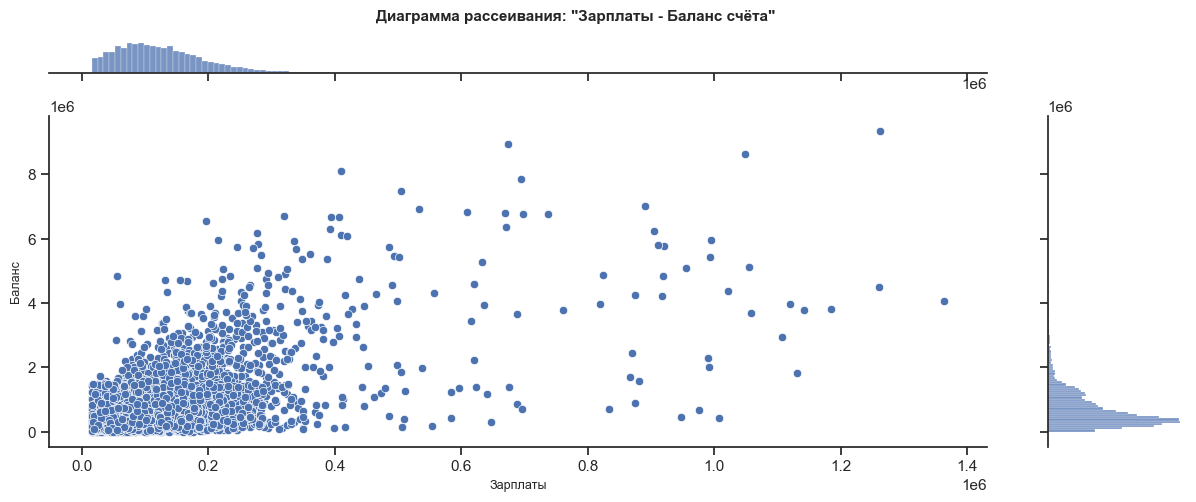

In [30]:
crit_joint = sn.jointplot(
    data=filtered_df, 
    y='balance', 
    x='est_salary'
    )

crit_joint.set_axis_labels('Зарплаты', 'Баланс', size=9);
crit_joint.fig.suptitle('Диаграмма рассеивания: "Зарплаты - Баланс счёта"', weight='semibold', size=11);
crit_joint.fig.tight_layout();
plt.gcf().set_size_inches(13,5);

**Наблюдения:**

- Наблюдаемая ранее связь стала чуть яснее - до уровня ЗП в 200 тысяч разброс в балансе меньше (не считая нескольких выбросов);
- После границы зарплаты в 200 тыс. рублей появляется больший разброс в значениях баланса счёта, с дальнейшим ростом ЗП он усиливается. 

Посчитаем коэффициент корреляции Пирсона для двух групп клиентов: ЗП до 200 тыс. и свыше 200 тыс. рублей:

In [31]:
print(f'Коэфф. корреляции Пирсона для пары "Зарплата - Баланс счёта":')
print(f'Для клиентов с ЗП до 200 тыс.рублей:', round(filtered_df.query('est_salary < 200000')['est_salary'].corr(filtered_df.query('est_salary < 200000')['balance']), 3))
print(f'Для клиентов с ЗП свыше 200 тыс.рублей:', round(filtered_df.query('est_salary > 200000')['est_salary'].corr(filtered_df.query('est_salary > 200000')['balance']), 3))
print(f'Кол-во клиентов с ЗП свыше 200 тыс.рублей:', len(filtered_df.query('est_salary > 200000')))

Коэфф. корреляции Пирсона для пары "Зарплата - Баланс счёта":
Для клиентов с ЗП до 200 тыс.рублей: 0.269
Для клиентов с ЗП свыше 200 тыс.рублей: 0.459
Кол-во клиентов с ЗП свыше 200 тыс.рублей: 1725


В базе 1725 клиентов с заработной платой выше 200 тыс.рублей. 

По графику можно сделать вывод, что поведение двух этих групп отличается в контексте хранения денежных средств. Заработная плата является одним из ключевых признаков клиента для банков, поэтому стоит рассматривать и сравнивать остальные признаки в этих группах по-отдельности.



In [32]:
below_200 = filtered_df.query('est_salary <= 200000')
above_200 = filtered_df.query('est_salary > 200000')

### Графики

В базе у клиентов есть два типа признаков - категориальные и числовые. Для каждого из них подойдут разные виды графиков. В этом разделе мы:

- Напишем функции для автоматизации работы с базой и построения графиков;
- Построим графики сначала для всей базы целиком;
- Построим графики отдельно для двух групп по размеру ЗП: до 200 тысяч и свыше 200 тысяч рублей;
___________________

**Подготовка функций**

1. Функция построения сводных таблиц для категориальных данных
2. Функция построения графиков для категориальных данных
3. Функция построения графиков для числовых данных

In [33]:
def category_pivot(data, column):
    table = data.pivot_table(index=[column, 'churn'], values='user_id', aggfunc='count').reset_index()
    table.columns = [column, 'churn', 'churn_count']
    for i in table[column]:    
        table.loc[table[column] == i, 'total'] = table.loc[table[column] == i, 'churn_count'].sum()
    table['proportion'] = round(table['churn_count'] / table['total'], 3)*100
    table['churn'] = table['churn'].replace({0:'Не уходящие', 1:'Уходящие'})
    return table

In [34]:
def category_graph(data, column):   
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    fig.suptitle(f'Уходящие и не уходящие клиенты. Столбчатые диаграммы по категории: {column}', y=0.99, fontsize=13, weight='bold')

    sn.barplot(data = data, x=column, y='churn_count', hue='churn',ax = ax[0]);
    ax[0].set_title('Кол-во клиентов', fontsize = 12, color = 'Black')
    ax[0].set_ylabel('Кол-во клиентов', loc='center', fontsize = 11)
    ax[0].set_xlabel(cat_labels[column], loc='center', fontsize = 11)
    ax[0].bar_label(ax[0].containers[0], padding=5, fontsize=10)
    ax[0].bar_label(ax[0].containers[1], padding=5, fontsize=10)
    ax[0].grid(visible=True, which='major', axis='y', ls='--', alpha=0.6)
    ax[0].legend(fontsize=9, loc='upper right');

    sn.barplot(data = data, x=column, y='proportion', hue='churn', ax = ax[1]);
    plt.ylim(0, 100)
    ax[1].set_title('Доли клиентов в разрезе оттока, %', fontsize = 12, color = 'Black')
    ax[1].set_ylabel('Доля от общего числа клиентов, %', loc='center', fontsize = 11)
    ax[1].set_xlabel(cat_labels[column], loc='center', fontsize = 11)
    ax[1].bar_label(ax[1].containers[0], padding=5, fontsize=10)
    ax[1].bar_label(ax[1].containers[1], padding=5, fontsize=10)
    ax[1].axhline(df['churn'].mean()*100, linewidth=2, color='r', alpha=0.8, linestyle=':', 
                          label = 'Ср. уровнь оттока = {:.1%}'.format(df['churn'].mean()));
    ax[1].legend(fontsize=9, loc='upper right');
    ax[1].grid(visible=True, which='major', axis='y', ls='--', alpha=0.6)

In [35]:
def digit_graph(data, column):    
    
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    plt.xlim(data[column].min(), data[column].max())
    fig.suptitle(f'Уходящие и не уходящие клиенты. Гистограммы столбца: {column}', y=0.99, fontsize=13, weight='bold')

    sn.histplot(data = data, x=column, hue='churn', kde=True, ax = ax[0], bins=30);
    ax[0].set_title('Гистограмма', fontsize = 12, color = 'Black')
    ax[0].set_ylabel('Кол-во клиентов', loc='center', fontsize = 11)
    ax[0].set_xlabel(digit_labels[column], loc='center', fontsize = 11)
    ax[0].grid(visible=True, which='major', axis='y', ls='--', alpha=0.6)

    sn.kdeplot(data=data, x=column, hue="churn", multiple="fill", ax = ax[1]);
    ax[1].axhline(df['churn'].mean(), linewidth=2, color='r', alpha=0.9, linestyle=':', 
                      label = 'Ср. уровнь оттока = {:.1%}'.format(df['churn'].mean()));
    ax[1].legend(fontsize=11, loc='upper right')
    ax[1].set_title('Гистограмма плотностей', fontsize = 12, color = 'Black')
    ax[1].set_ylabel('Плотность', loc='center', fontsize = 11)
    ax[1].set_xlabel(digit_labels[column], loc='center', fontsize = 11)
    ax[1].grid(visible=True, which='major', axis='y', ls='--', alpha=0.6)

#### Общие графики

In [36]:
categories = ['gender', 'equity', 'products', 'credit_card', 'last_activity', 'city']
cat_labels = pd.Series(data={
    'gender': 'Пол', 
    'equity': 'Баллы собственности', 
    'products': 'Кол-во продуктов', 
    'credit_card': 'Наличие кредитной карты', 
    'last_activity': 'Недавняя активность', 
    'city': 'Город'
    })

digit_labels = pd.Series(data={
    'score': 'Кредитный рейтинг', 
    'age': 'Возраст', 
    'balance': 'Баланс счёта', 
    'est_salary': 'Размер заработной платы'
    })

gender, equity, products, credit_card, last_activity, city = [category_pivot(filtered_df, x) for x in categories]

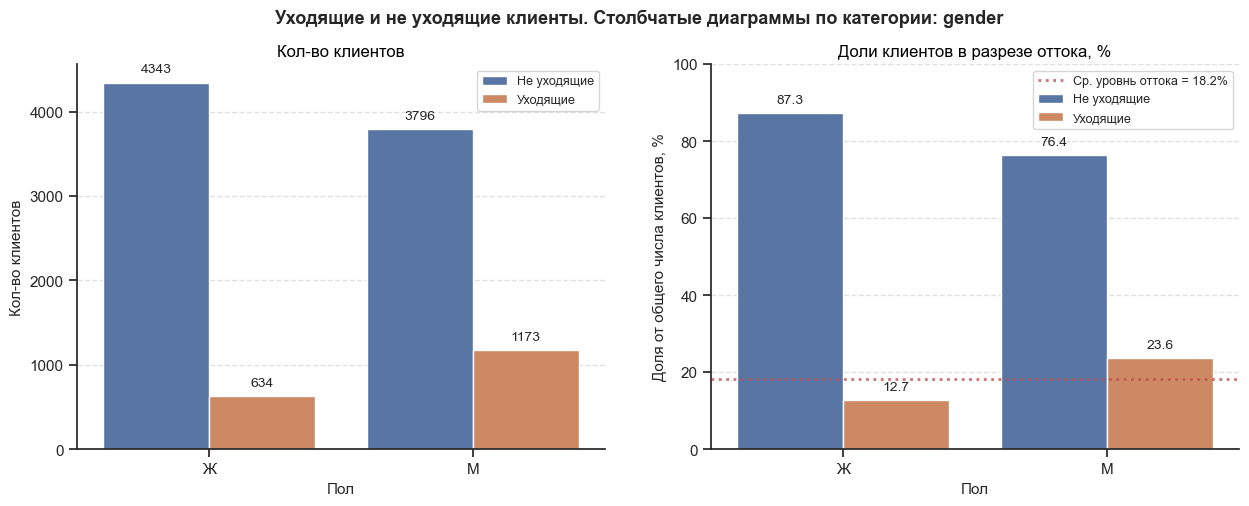

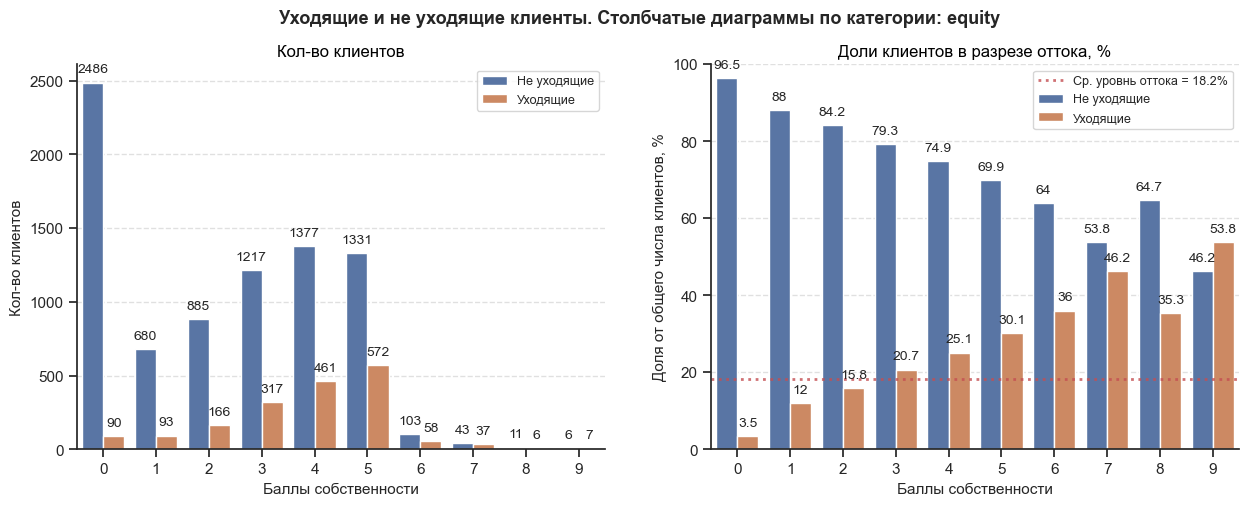

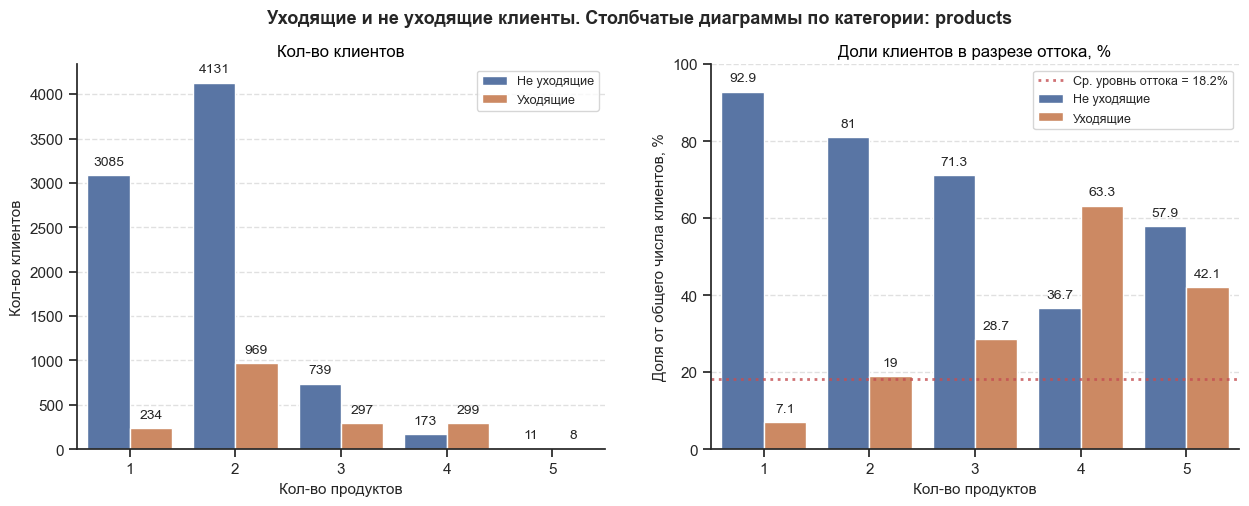

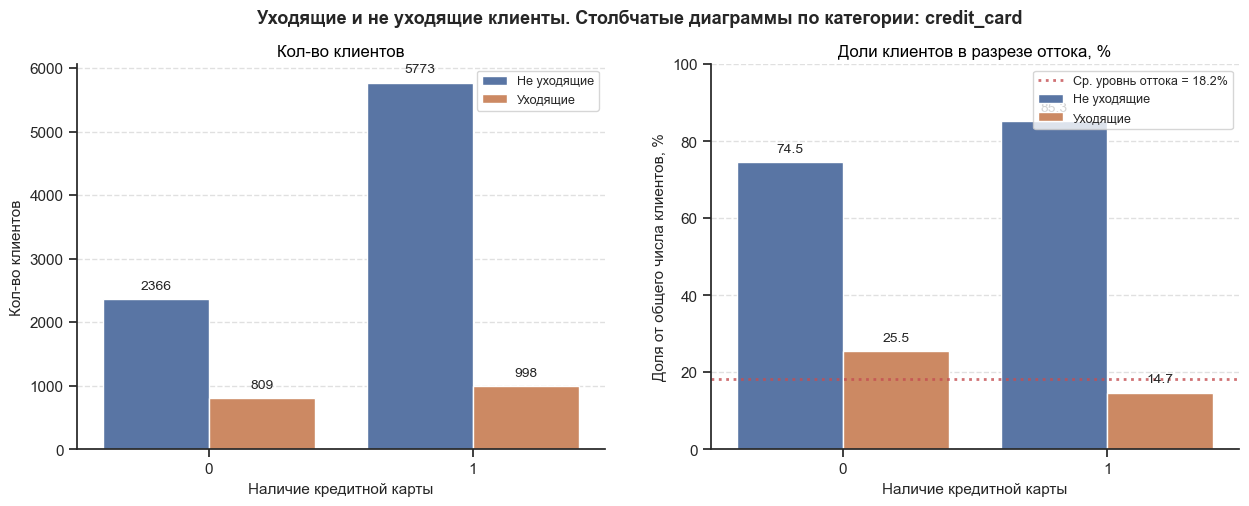

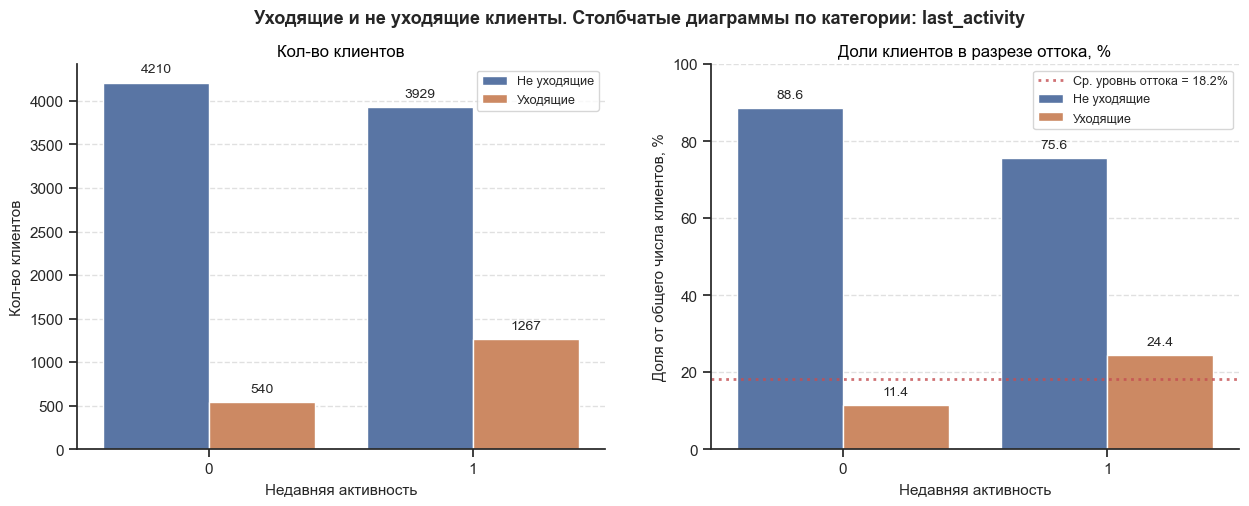

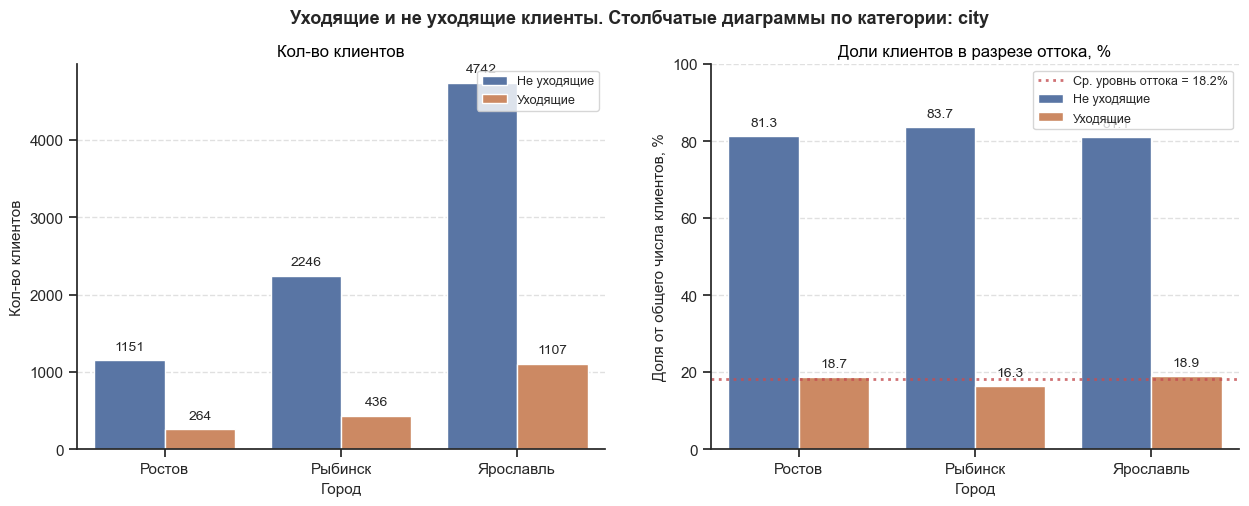

In [37]:
for i in [gender, equity, products, credit_card, last_activity, city]:
    category_graph(i, i.columns[0])

**Наблюдения:**

Средний уровень оттока клиентов по базе равен **18.2%**

- Уровень оттока среди мужчин выше среднего - 23.6%, у женщин ниже среднего - 12.6%;
- С ростом кол-ва баллов имущества растёт и уровень оттока. Начиная с 4 баллов уровень оттока уже более 25%;
- С ростом кол-ва продуктов растёт и уровень оттока. Доля оттока клиентов с 3-мя открытыми продуктами - 28.7%, с 4-мя - уже 63.3%
- Доля оттока клиентов без кредитных карт - 25.5%. У владельцев кредитных карт этот уровень заметно ниже среднего.
- Как ни странно, клиенты без активности за последнее время реже уходят, чем те, что активно пользуются услугами банка.
- В трёх рассматриваемых городах средний уровень оттока близок по значениям к среднему по всей базе. При сегментации нужно будет смотреть на сочетание с другими факторами. 
____________

Построим графики для числовых столбцов:

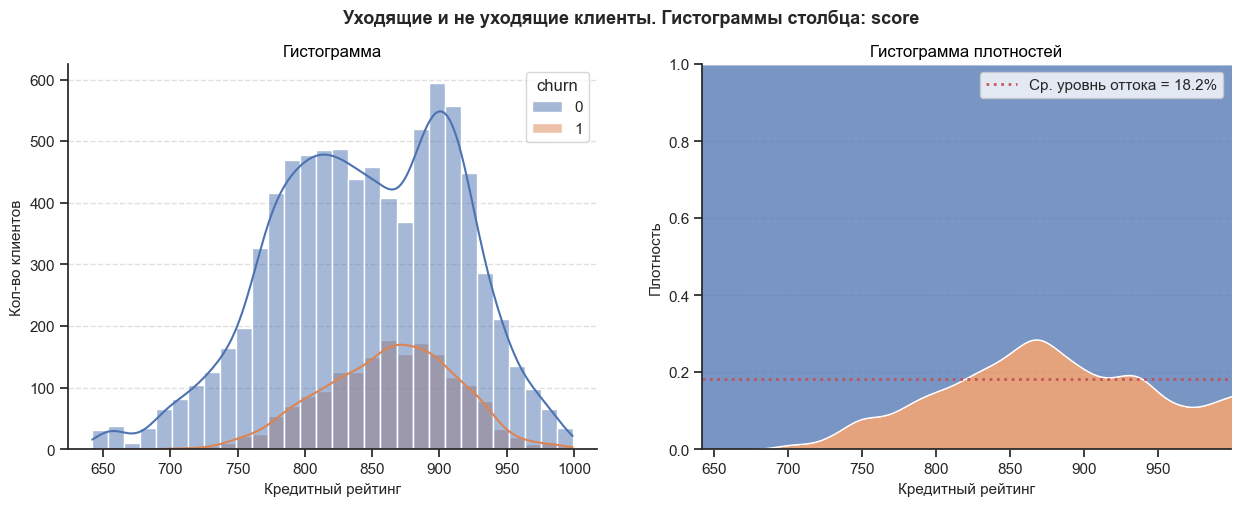

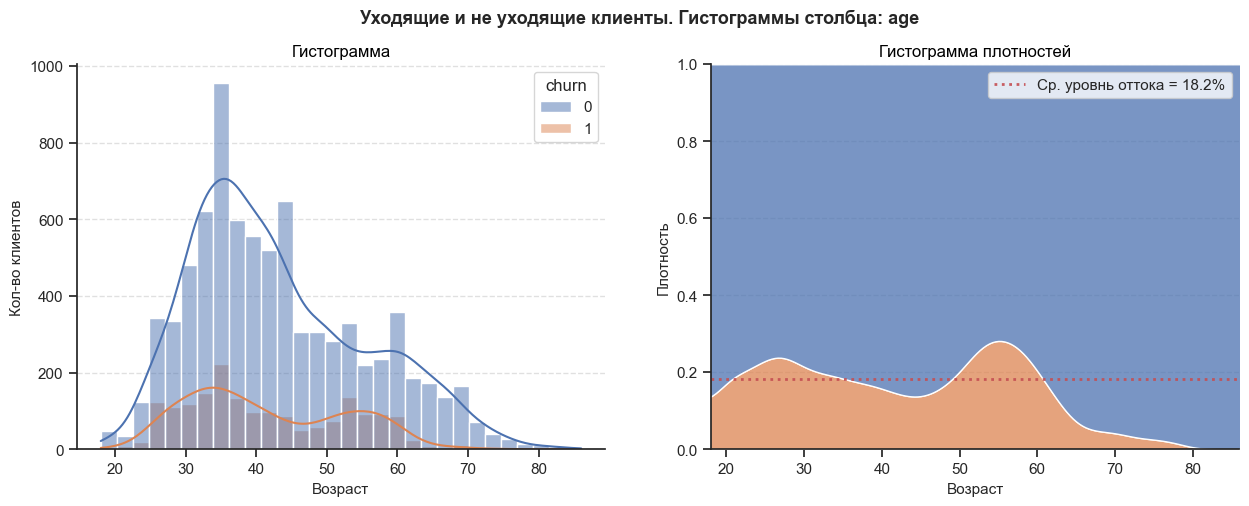

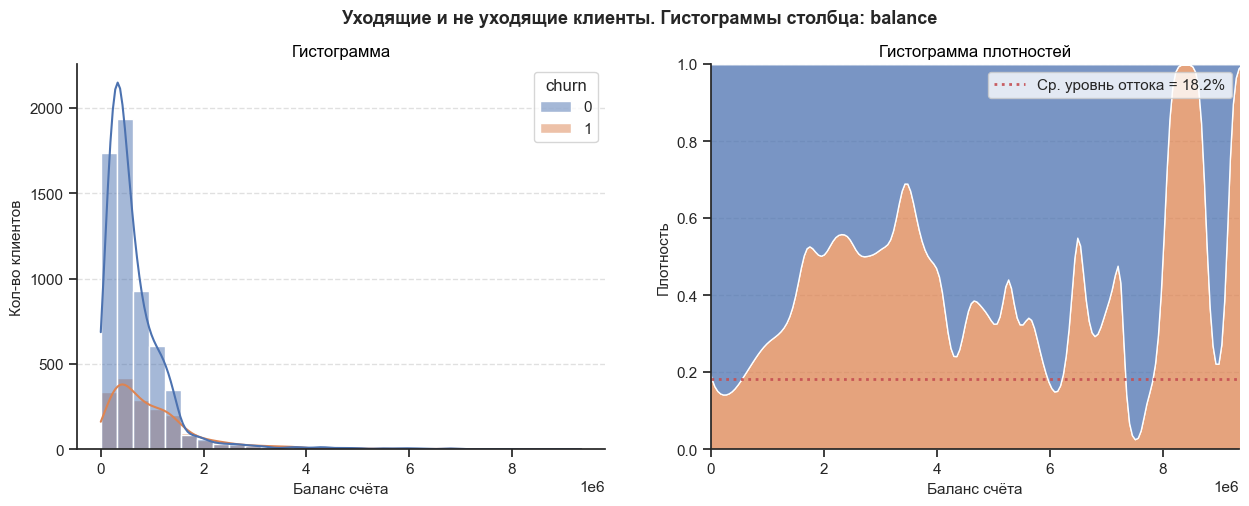

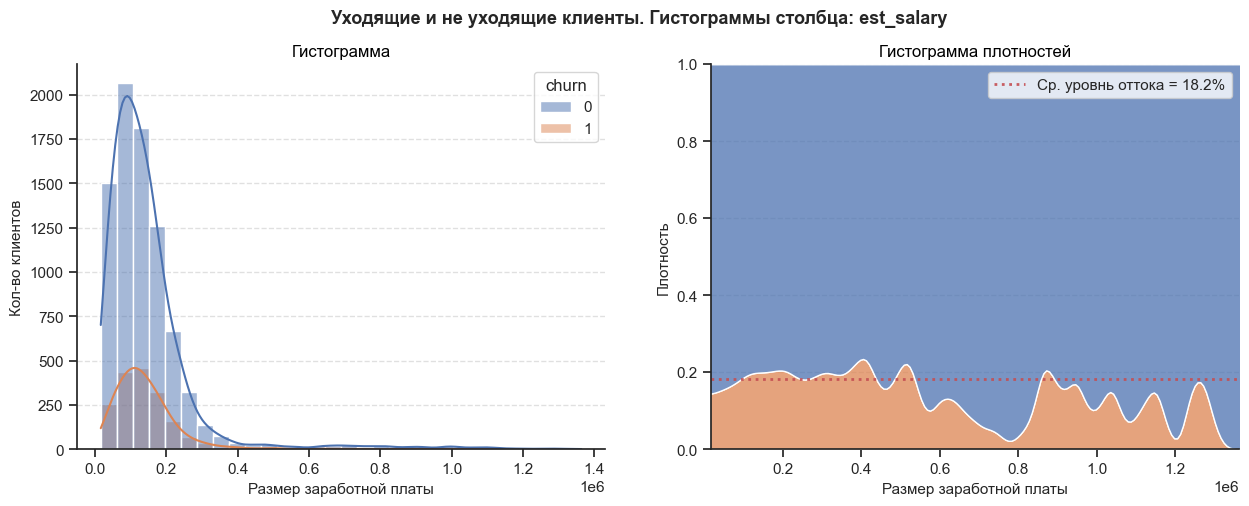

In [38]:
for i in ['score', 'age', 'balance', 'est_salary']:
    digit_graph(filtered_df, i)

**Наблюдения:**

Средний уровень оттока клиентов по базе равен **18.2%**

- Обладатели кредитного рейтинга в диапазоне **от ~830 до 900 баллов** находятся в зоне риска для банка - уровень оттока у них выше среднего.
- На графике видны две зоны риска по возрасту - **от 23 до 35 лет** и **от 50 до 60 лет**;
- Клиенты с уровнем баланса **более ~1 млн рублей** уходят заметно чаще. График не очень стабильный, т.к. их меньше, чем клиентов с балансом до 1 млн. Однако доля уходящих всё равно выше среднего. 
- Разница в уровне оттока у обладателей разных зарплат по графику неочевидна - уровень оттока редко превышает средний. Отчасти можно выделить лишь клиентов с уровнем ЗП около 400 и 500 тыс. руб. Но их недостаточно для выделения в сегмент.
____________

#### Клиенты с ЗП до 200 тысяч

In [39]:
categories = ['gender', 'equity', 'products', 'credit_card', 'last_activity', 'city']
gender, equity, products, credit_card, last_activity, city = [category_pivot(below_200, x) for x in categories]

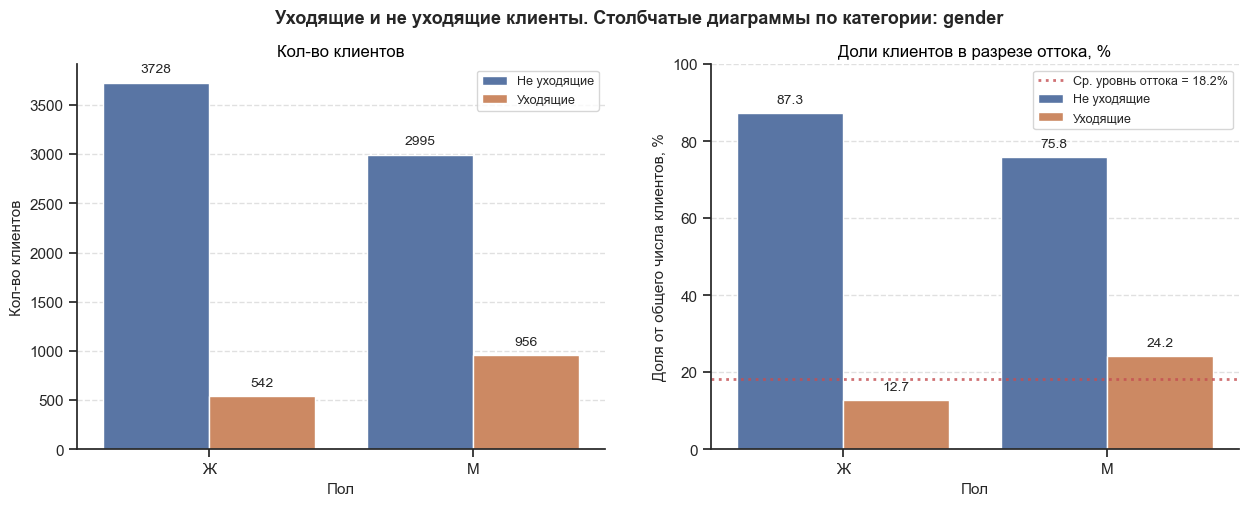

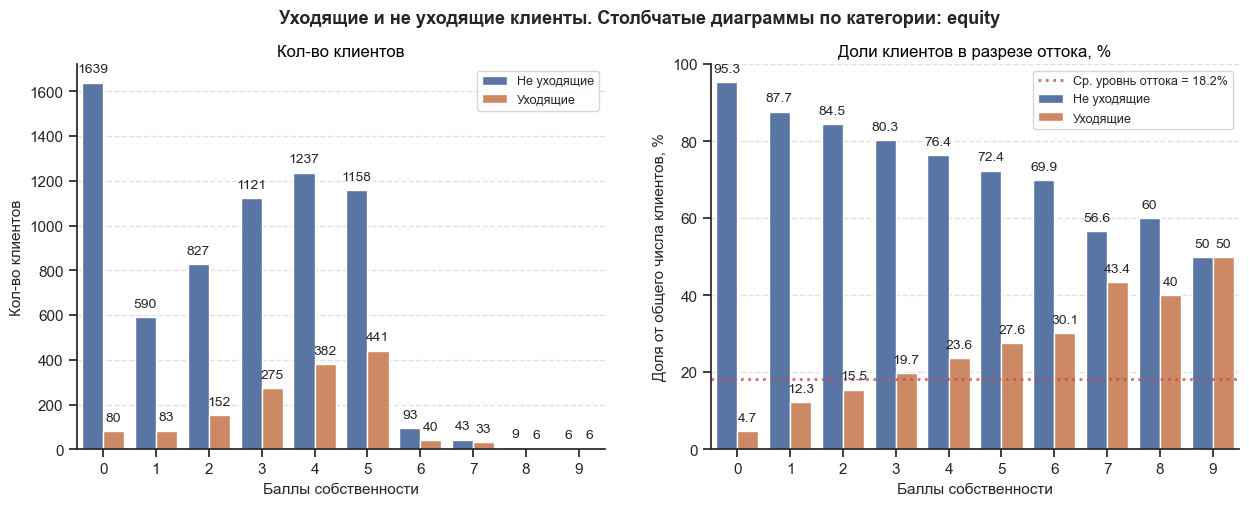

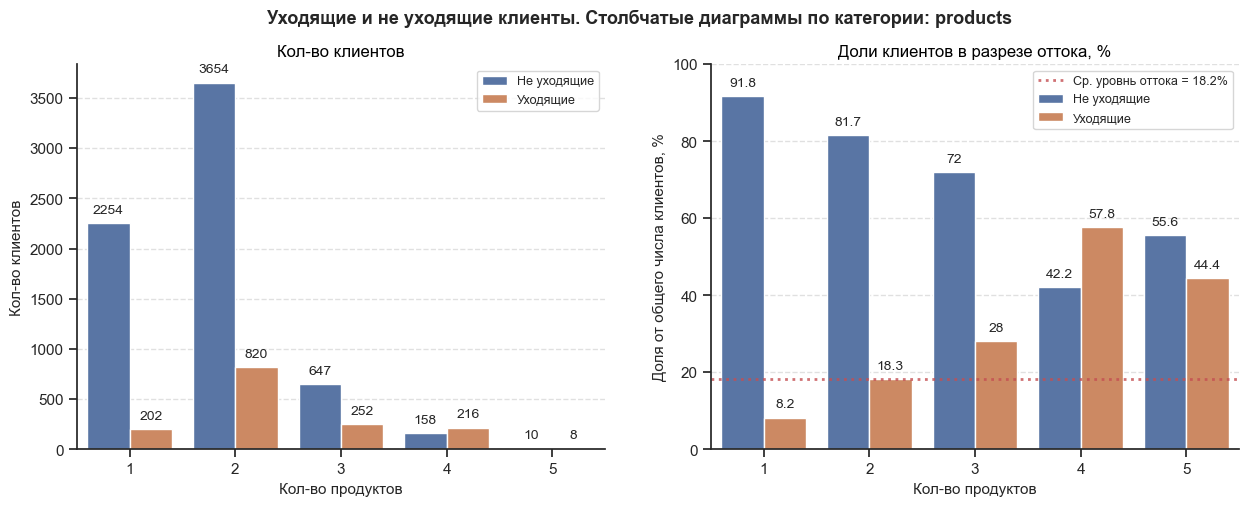

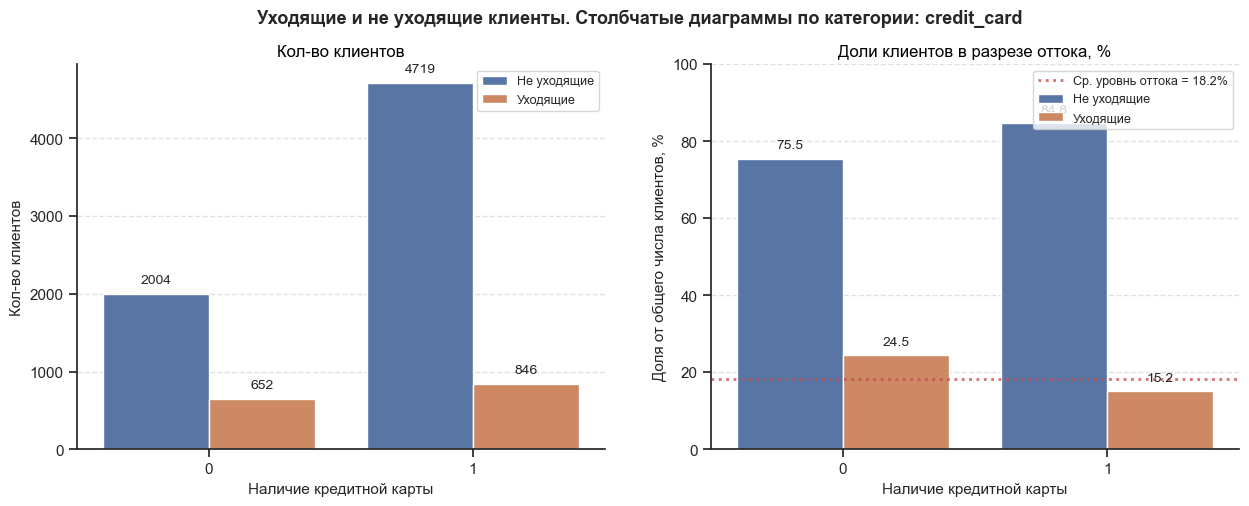

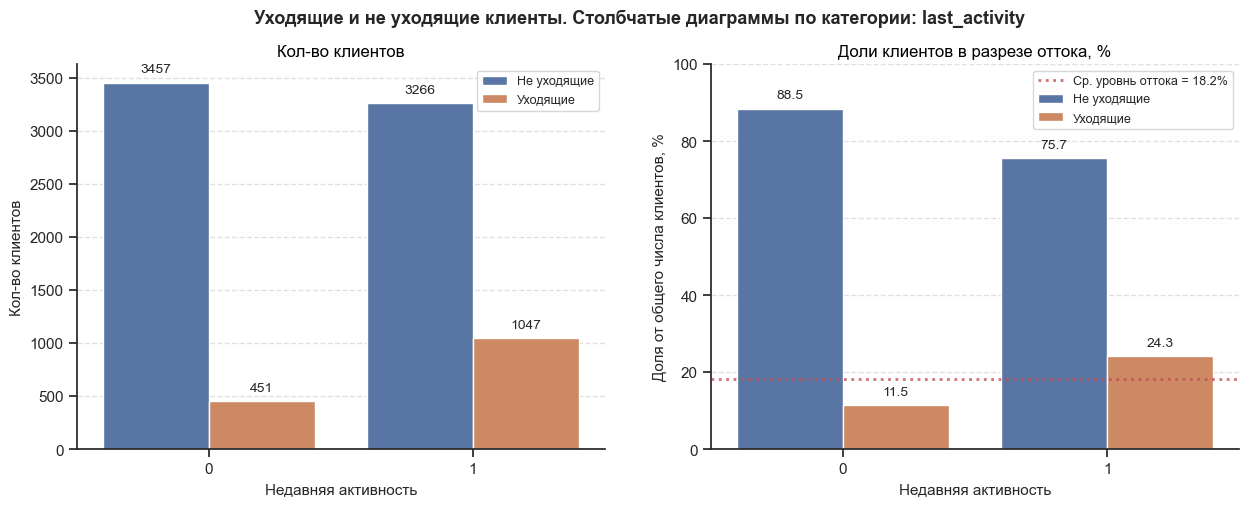

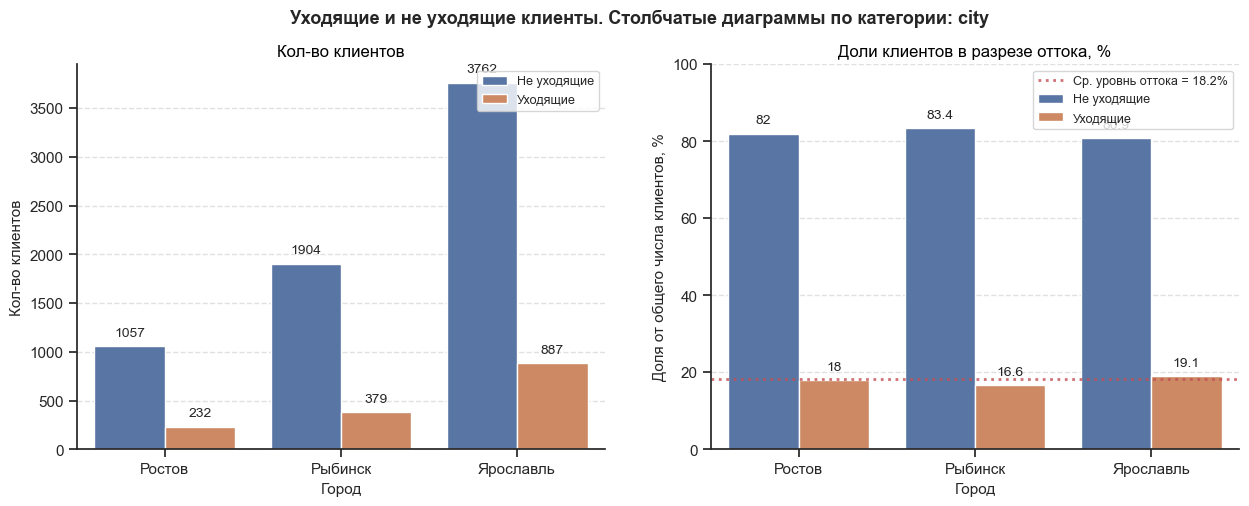

In [40]:
for i in [gender, equity, products, credit_card, last_activity, city]:
    category_graph(i, i.columns[0])

**Наблюдения:**

Картина в большистве случаев очень похожа на общие графики. Интересующие нас показатели отличаются несильно. Например:

- С ростом кол-ва баллов собственности растет и уровень оттока. Однако скорость роста чуть ниже чем на общих графиках;
- Доля оттока клиентов с 3-мя открытыми продуктами - 28%, с 4-мя - 57%;

____________

Построим графики для числовых столбцов:

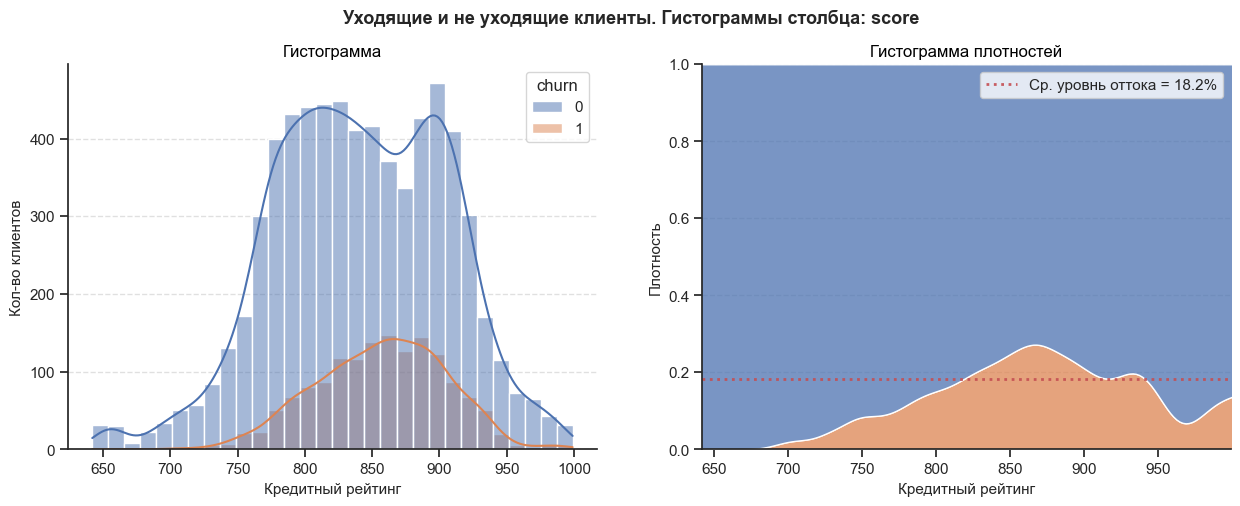

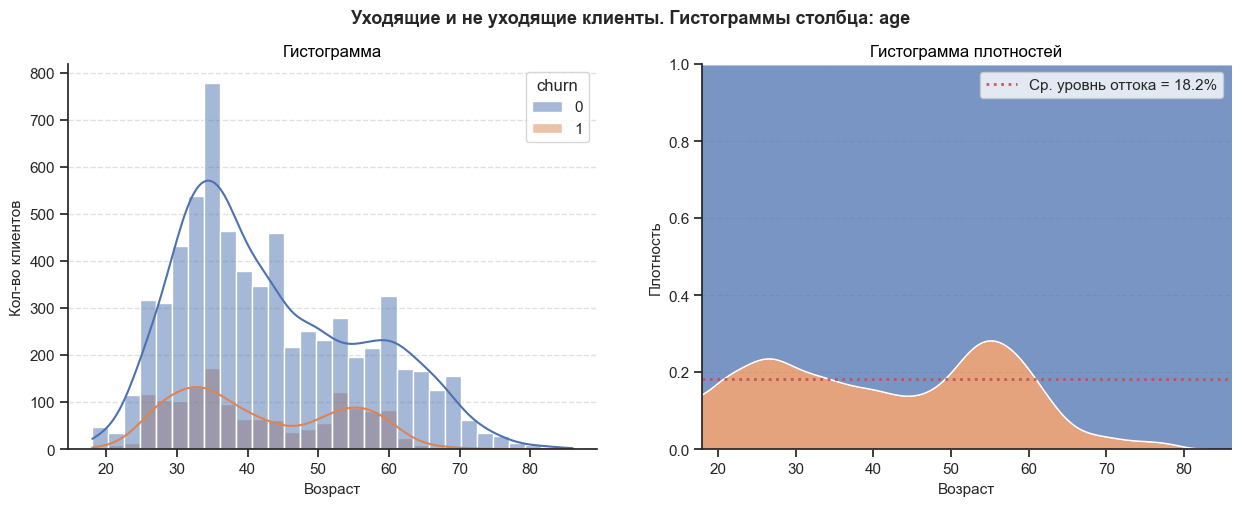

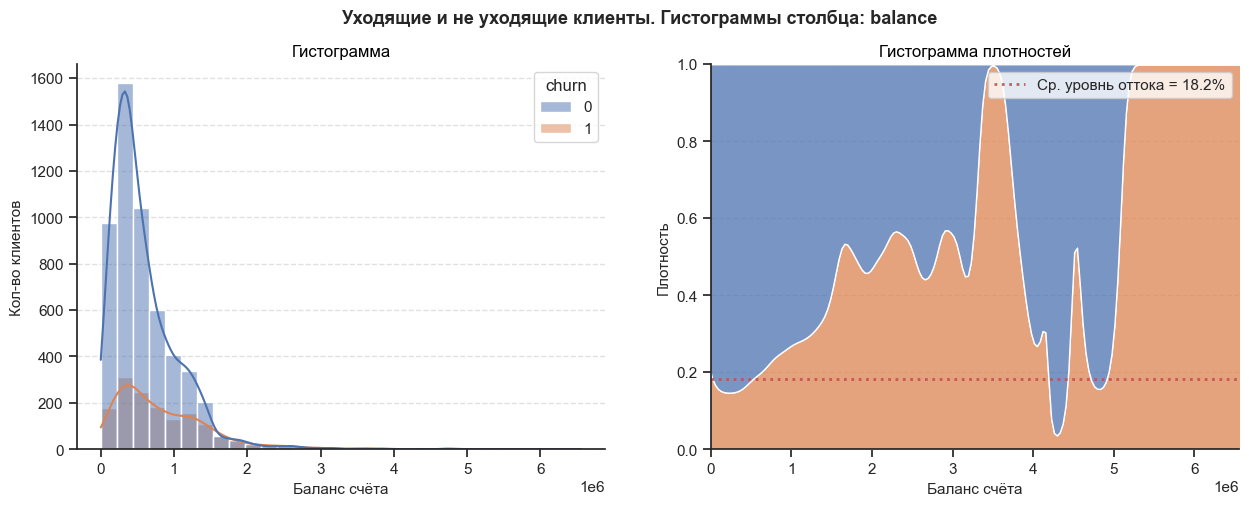

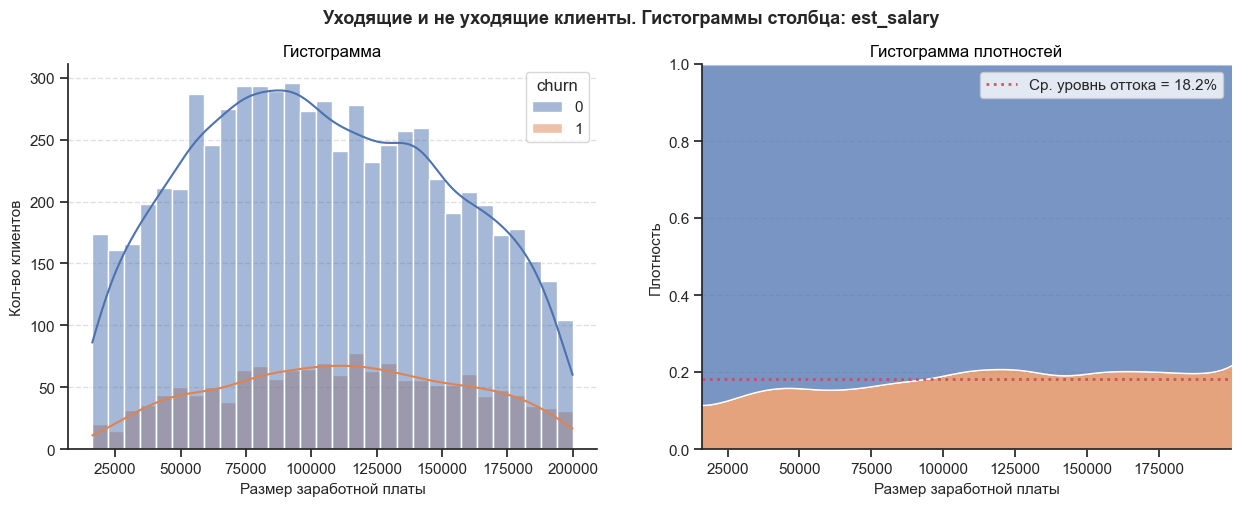

In [41]:
for i in ['score', 'age', 'balance', 'est_salary']:
    digit_graph(below_200, i)

**Наблюдения:**

Без глобальных различий с общей базой. Обозначим ключевые тезисы:

- Кредитный рейтинг **от ~830 до 900 баллов** - уровень оттока у них выше среднего;
- Возраст **от 23 до 35 лет** и **от 50 до 60 лет** - уровень оттока у них выше среднего;
- Баланс **более ~1 млн рублей**  - так же в группе риска.  График не очень стабильный, т.к. их меньше, чем клиентов с балансом до 1 млн. Однако доля уходящих всё равно выше среднего. 

___________________



#### Клиенты с ЗП свыше 200 тысяч

In [42]:
categories = ['gender', 'equity', 'products', 'credit_card', 'last_activity', 'city']
gender, equity, products, credit_card, last_activity, city = [category_pivot(above_200, x) for x in categories]

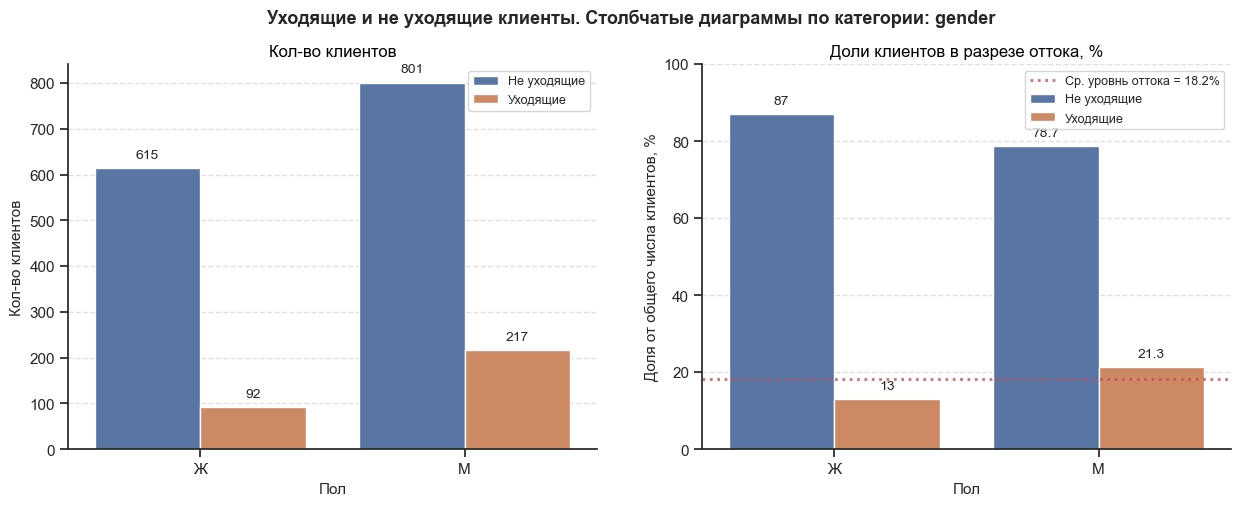

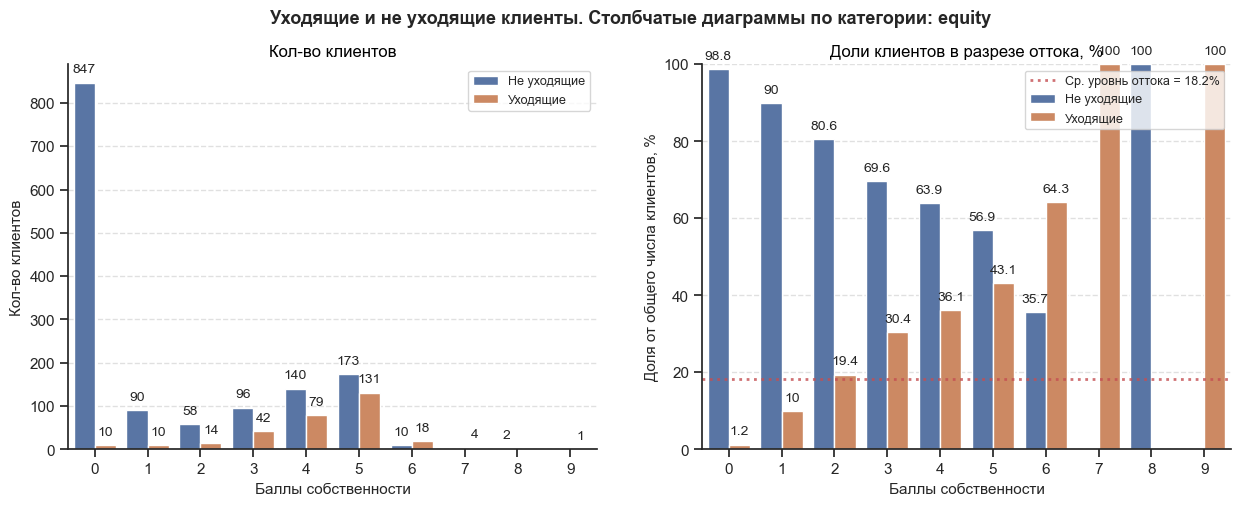

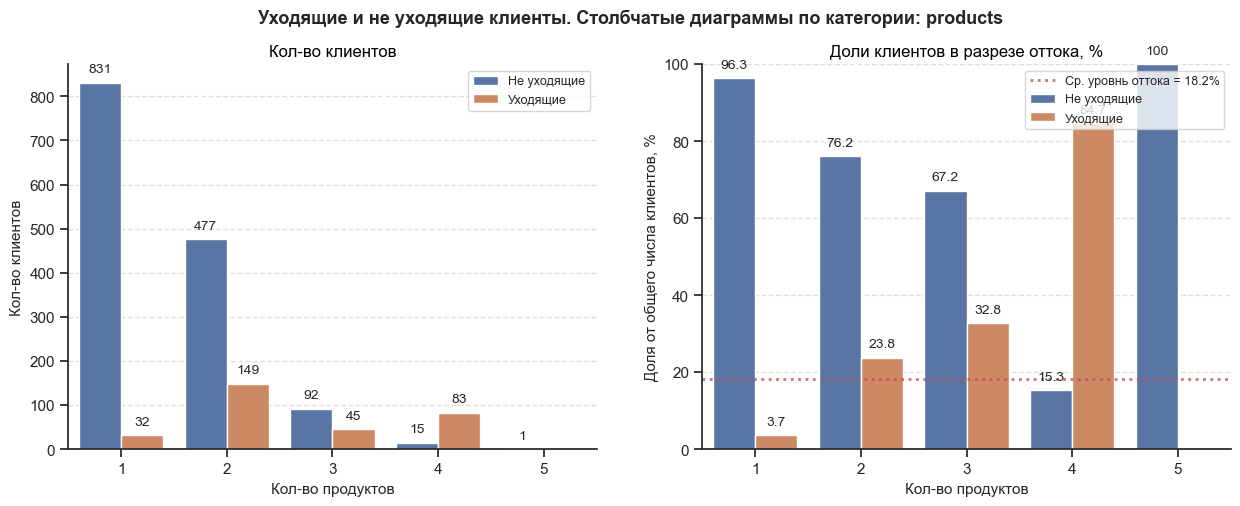

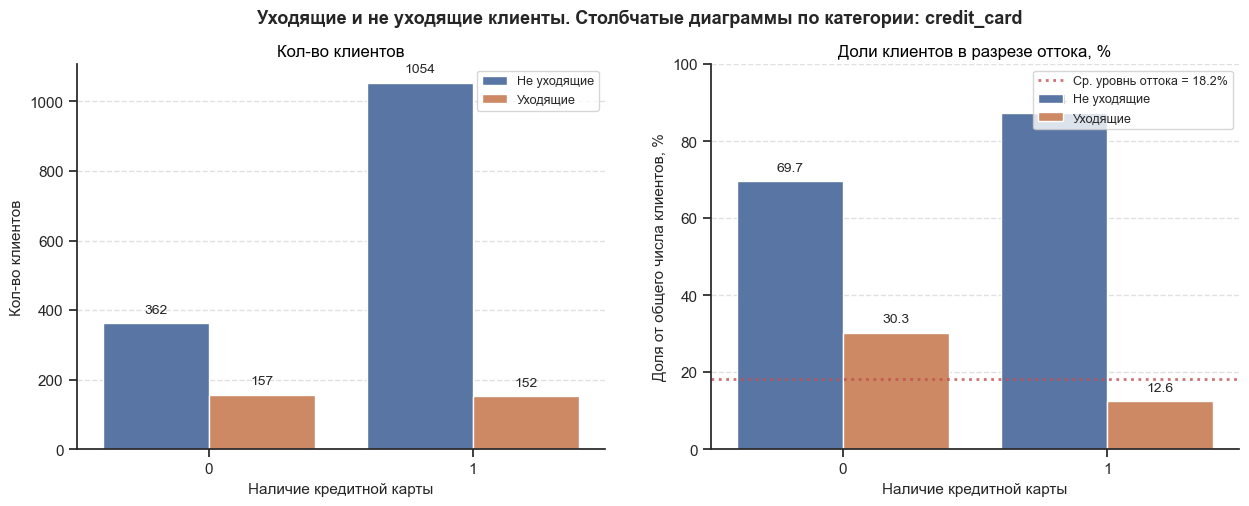

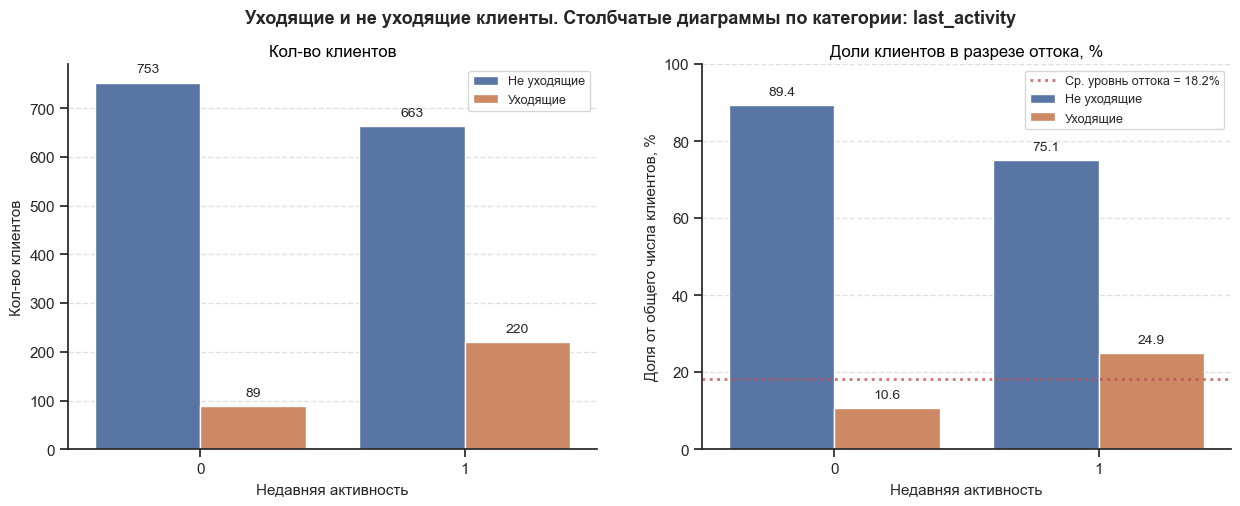

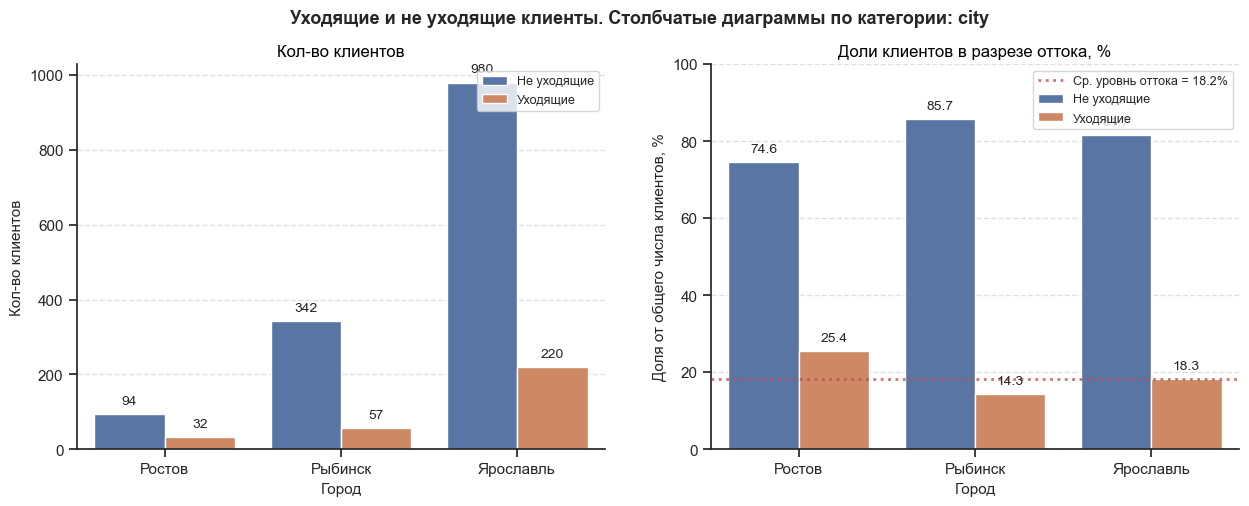

In [43]:
for i in [gender, equity, products, credit_card, last_activity, city]:
    category_graph(i, i.columns[0])

**Наблюдения:**

У клиентов с ЗП > 200 тыс.руб. отличий заметно больше:

- Уровень оттока в разрезе пола отличается несущественно;
- Столбец `"equity"`: начиная с **3 баллов** уровень оттока уже более 30% (в общей базе было 25% при 4 баллах);
- Столбец `"products"`: уровень оттока клиентов с 2-мя открытыми продуктами - уже почти 24%, с 3-мя - 32.8%, с 4-мя - почти 85%. 
- Клиенты с **ЗП > 200 тыс.** и со значением `"products"` **2 и более**, учитывая их количество, могут быть первыми кандидатами на выделение в отдельный сегмент: 277 клиентов из 861 - уходящие, суммарный средний уровень оттока составляет 32.2%;
- Доля оттока клиентов без кредитных карт - 30%. Это на 5% больше, чем у аналогичных клиентов по общей базе.
- Клиенты с высокими ЗП из Ростова чаще уходят из банка, чем в Рыбинске и Ярославде. Однако суммарное кол-во таких ростовчан не очень велико.  

___________________

Построим графики для числовых столбцов:

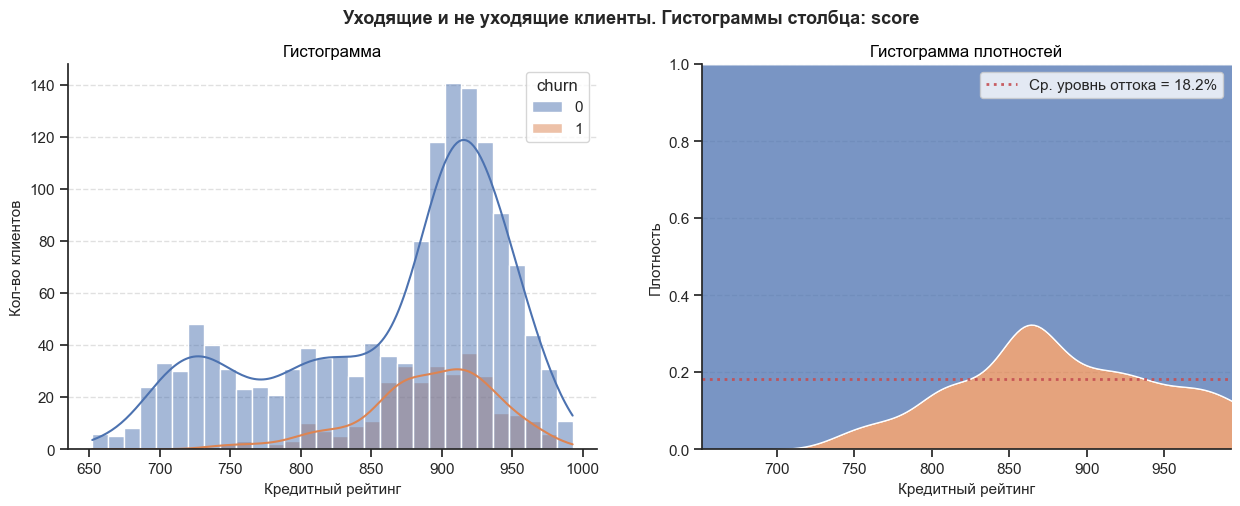

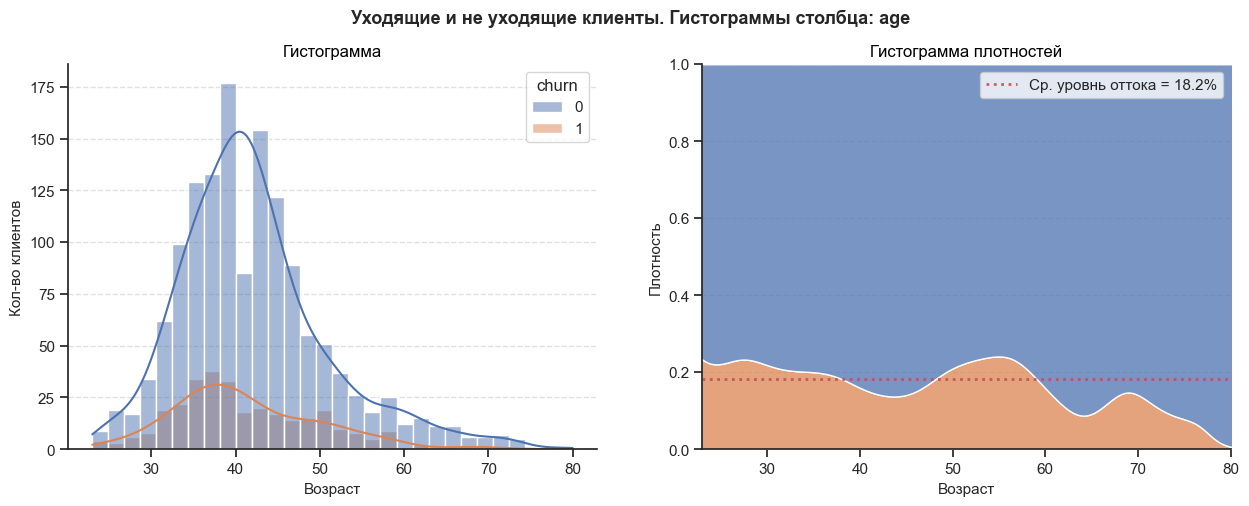

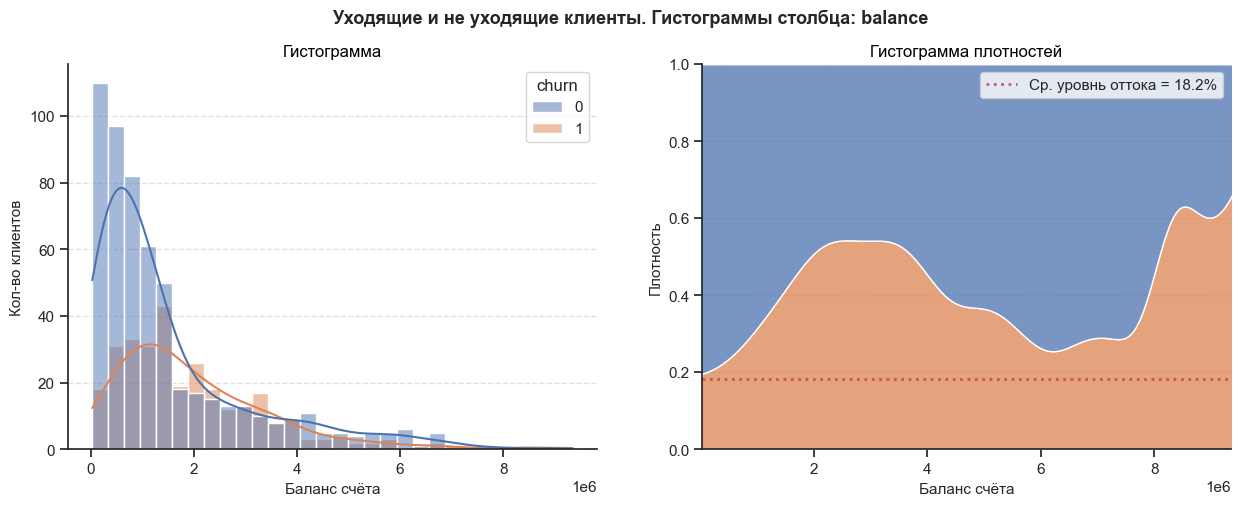

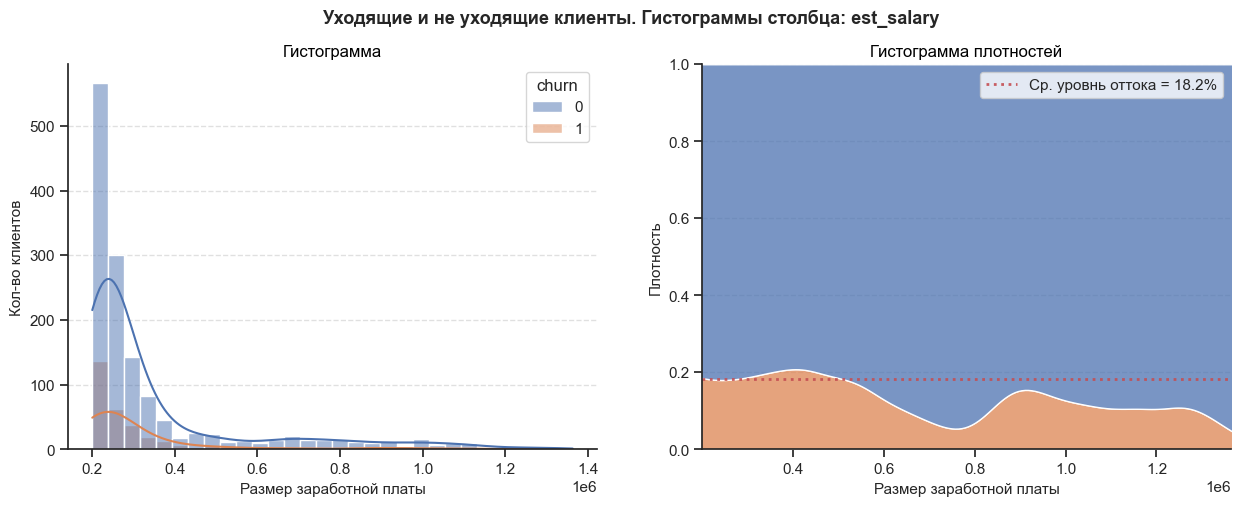

In [44]:
for i in ['score', 'age', 'balance', 'est_salary']:
    digit_graph(above_200, i)

**Наблюдения:**

В группе с ЗП > 200 тыс.рублей на числовых графиках так же есть отличия от общих:

- Диапазон кредитного рейтинга с повышенным уровнем оттока здесь чуть шире - **от ~830 до ~930 баллов**. И сама доля отточных клиентов на графике тоже чуть больше. 
- Зоны повышенного оттока по возрасту - **от 20 до 35 лет** и **от 50 до 60 лет**;
- Клиенты с уровнем баланса более **от 1 до 4 млн рублей** можно отнести к группе высокого риска - сегмент достаточно многочисленный, а кол-во уходящих клиентов порой превышает кол-во остающихся.
- Зарплаты распределены на графике достаточно равномерно, только в одном сегменте уровень оттока слегка превышает средний по базе.

___________________



### Таблица корреляции

**Строчные значения**

Для построения таблицы корреляции нам нужно перевести значения столбца `'gender'` из "М" и "Ж" в бинарный тип:

In [45]:
filtered_df['gender'] = filtered_df['gender'].replace({'М':1, 'Ж':0})

___________________
Посчитаем корреляцию столбца `'churn'` с остальными полями. Для надёжности сделаем это двумя методами - `.corr()` и `.phik_matrix()`. Связи других столбцов нам не так важны, поэтому возьмём только один столбец из каждой матрицы. Итого в таблице будет:
- Корреляция по общей базе методом `.corr()`
- Корреляция методом `.phik_matrix()` по общей базе
- Корреляция методом `.phik_matrix()` по базе с ЗП < 200 тыс.
- Корреляция методом `.phik_matrix()` по базе с ЗП > 200 тыс.

Метод `.phik_matrix()` для нас приоритетнее, т.к. он лучше работает с данными, в которых есть выбросы.

In [46]:
corr_1 = round(filtered_df.corr()['churn'], 3).to_frame()
corr_2 = round(filtered_df.phik_matrix()['churn'], 3)
corr_3 = round(below_200.phik_matrix()['churn'], 3)
corr_4 = round(above_200.phik_matrix()['churn'], 3)
corr_total = corr_1.join(corr_2.rename('churn_phik'))
corr_total = corr_total.join(corr_3.rename('churn_phik_bel200'))
corr_total = corr_total.join(corr_4.rename('churn_phik_ab200'))

corr_total

interval columns not set, guessing: ['user_id', 'score', 'gender', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn', 'city_Ростов', 'city_Рыбинск', 'city_Ярославль']
interval columns not set, guessing: ['user_id', 'score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn', 'city_Ростов', 'city_Рыбинск', 'city_Ярославль']
interval columns not set, guessing: ['user_id', 'score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn', 'city_Ростов', 'city_Рыбинск', 'city_Ярославль']


churn  churn_phik  churn_phik_bel200  churn_phik_ab200
user_id        -0.007       0.143              0.150             0.081
score           0.104       0.231              0.217             0.303
gender          0.141       0.219              0.231             0.160
age            -0.051       0.184              0.195             0.063
equity          0.270       0.352              0.291             0.636
balance         0.193       0.280              0.202             0.333
products        0.302       0.260              0.225             0.419
credit_card    -0.130       0.202              0.176             0.321
last_activity   0.169       0.261              0.255             0.285
est_salary     -0.004       0.044              0.073             0.058
churn           1.000       1.000              1.000             1.000
city_Ростов     0.005       0.000              0.000             0.072
city_Рыбинск   -0.030       0.044              0.036             0.069
city_Ярославль  0.023       0.033              0.035             0.000

Визуализируем таблицу с помощью тепловой диаграммы:

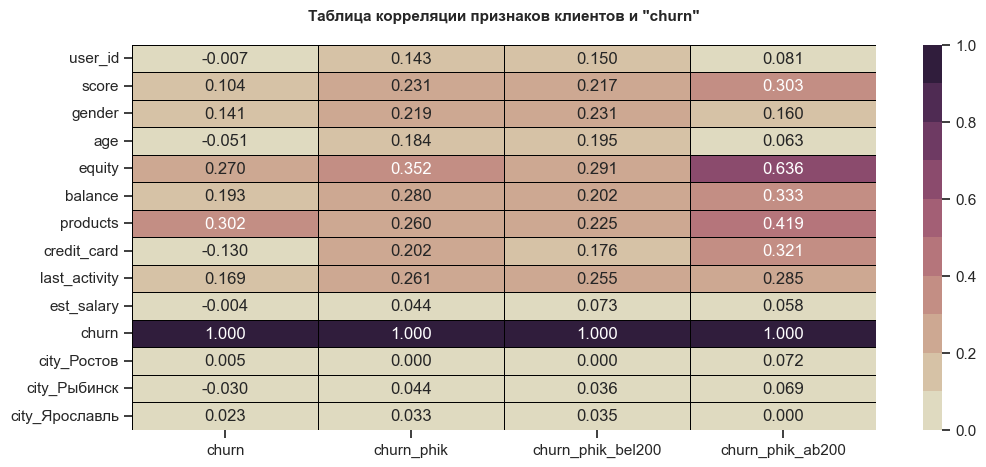

In [47]:
fig, ax = plt.subplots(figsize=(12, 5))
plt.title('Таблица корреляции признаков клиентов и "churn"' + "\n", fontsize = 11, weight='semibold');

sn.heatmap(
    corr_total, 
    annot=True, 
    fmt=".3f", 
    cmap=sn.cubehelix_palette(10, rot=0.55),
    vmin=0, vmax=1,
    linecolor='Black',
    linewidth=0.5
);


**Наблюдения:**

- Если смотреть на базу в целом, то связь признаков с оттоком можно оценить как слабовыраженную. Чуть выделяется столбец `'equity'`, но корреляция всё ещё несильная;
- Связь признаков с оттоком в группе клиентов с зарплатами до 200 тыс. по значениям практически совпадает со значениями по общей базе;

Корреляция признаков с оттоком в группе клиентов с ЗП > 200 т.р. местами отражает увиденное нами на графиках:
- Коэффициент по столбцу `'equity'` составляет 0.636 - такую связь можно считать существенной;
- Коэффициент по столбцу `'products'` составляет 0.419 - связь несильная, но определённо заметная. Это выше, чем у остальной базы;
- Связь по некоторым другим признакам также превышает значения по основной базе, но она всё равно достаточно слабая. Нужно будет искать сочетания факторов.


## Статистический анализ

### Гипотеза о равенстве дохода

Проверим гипотезу о различии дохода между теми клиентами, которые ушли и теми, которые остались. 
Еще раз посмотрим на распределение зарплат на гистограмме. Отметим на графике среднюю и медианную зарплату для каждой группы:

In [48]:
def stat_function(data, column, bins, name):
    fig, ax = plt.subplots(figsize=(15, 5))
    plt.xlim(data[column].min(), np.percentile(data[column], 95))
    fig.suptitle(f'Распределние кол-ва клиентов по столбцу \'{column}\' в разрезе оттока. {name}', y=0.99, fontsize=13, weight='bold')

    sn.histplot(data = data, x= column, hue = 'churn', kde=True, bins=bins);
    ax.set_ylabel('Кол-во клиентов', loc='center', fontsize = 11)
    ax.set_xlabel(column, loc='center', fontsize = 11)
    ax.grid(visible=True, which='major', axis='y', ls='--', alpha=0.6)
    ax.axvline(data.query('churn == 1')[column].median(), linewidth=2, color='darkblue', alpha=0.8, linestyle=':', 
                      label = 'Медиана = {:,.0f}'.format(data.query('churn == 1')[column].median()).replace(',', ' '))
    ax.axvline(data.query('churn == 0')[column].median(), linewidth=2, color='darkorange', alpha=1, linestyle=':', 
                      label = 'Медиана = {:,.0f}'.format(data.query('churn == 0')[column].median()).replace(',', ' '))
    ax.axvline(data.query('churn == 1')[column].mean(), linewidth=2, color='darkblue', alpha=0.5, linestyle='--', 
                      label = 'Средняя = {:,.0f}'.format(data.query('churn == 1')[column].mean()).replace(',', ' '))
    ax.axvline(data.query('churn == 0')[column].mean(), linewidth=2, color='darkorange', alpha=0.7, linestyle='--', 
                      label = 'Средняя = {:,.0f}'.format(data.query('churn == 0')[column].mean()).replace(',', ' '))
    plt.legend(fontsize=9, loc='upper right'); 

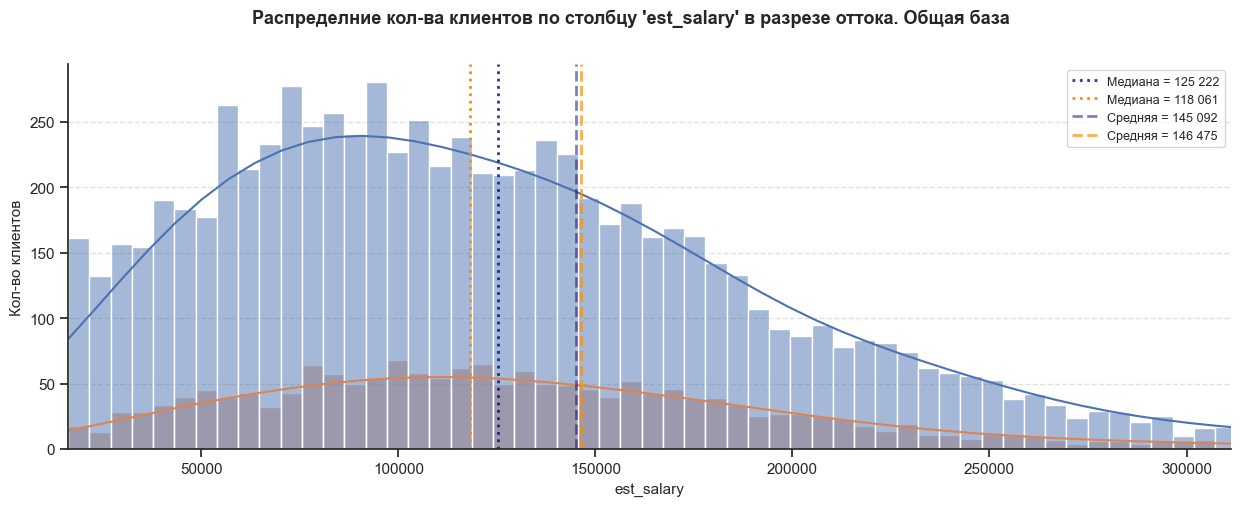

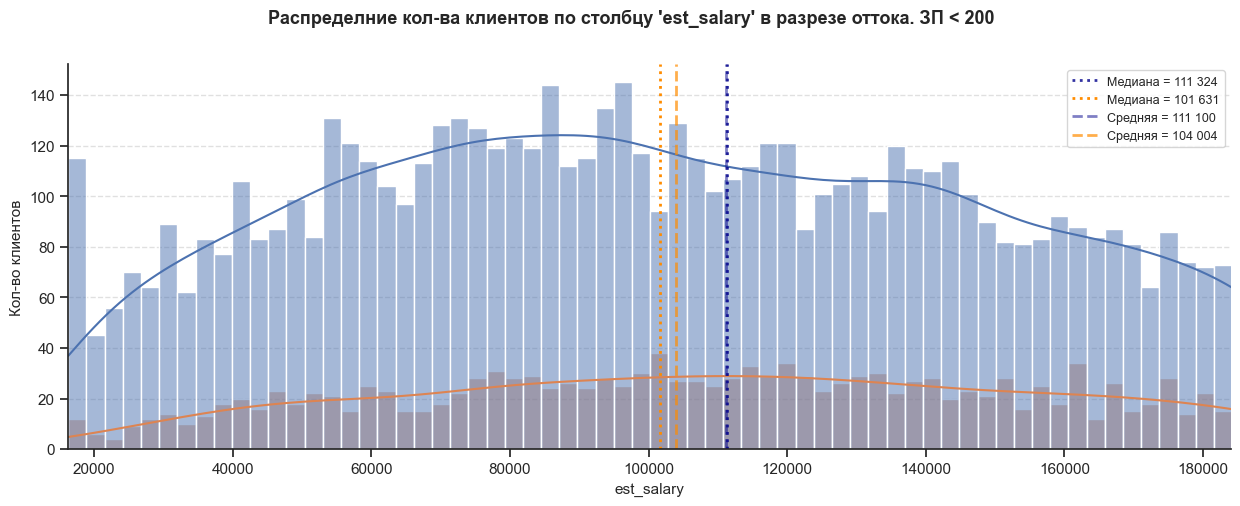

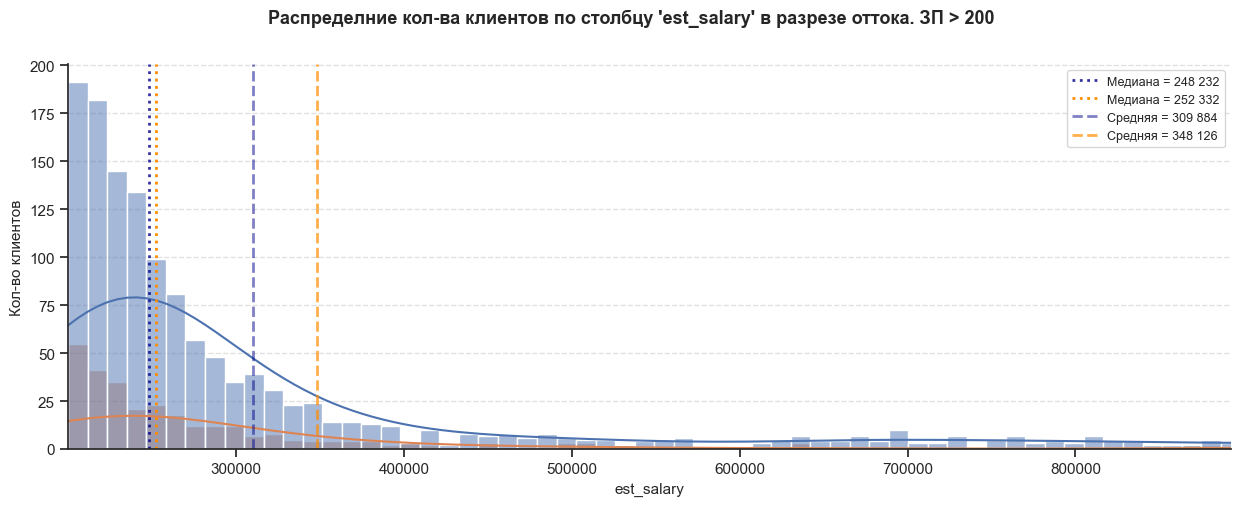

In [49]:
stat_function(filtered_df, 'est_salary', 250, 'Общая база')
stat_function(below_200, 'est_salary', 70, 'ЗП < 200')
stat_function(above_200, 'est_salary', 100, 'ЗП > 200')

**Наблюдения:**


- На графике общей базы видно, что средняя ЗП в обеих группах примерно одинаковая. Медианы обеих групп отстоят заметно левее средних. Разница между медианами - ~7 тыс.руб. 
- На графике базы клиентов с ЗП до 200 тыс. видим, что средняя и медианная ЗП неуходящих клиентов почти идентичны. Показатели отточных клиентов меньше почти на 10 тысяч. 
- На графике базы клиентов с ЗП до 200 тыс. наоборот, отточные клиенты в среднем зарабатывают больше тех, кто остаётся в банке. 

Проверим, есть ли статистическая значимость в этих отличиях. Проведём статистический тест. 

___________________

Обозначим нулевую и альтернативную гипотезы:

- *H0 - доходы уходящих клиентов и доходы клиентов, которые остались, **одинаковые**;*
- *Н1 - доходы уходящих клиентов и доходы клиентов, которые остались, **отличаются**;*

Проведём тест для всех трёх групп:

In [50]:
for data in [filtered_df, below_200, above_200]:
    print('Кол-во уходящих:', len(data.query('churn == 1')))
    print('Не уходящие:', len(data.query('churn == 0')))
    alpha = 0.05 

    results = st.ttest_ind(data.query('churn == 1')['est_salary'], data.query('churn == 0')['est_salary'])

    print('p-значение:', results.pvalue)

    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу, различия есть')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, различий нет')
    print()

Кол-во уходящих: 1807
Не уходящие: 8139
p-значение: 0.6923109269794161
Не получилось отвергнуть нулевую гипотезу, различий нет

Кол-во уходящих: 1498
Не уходящие: 6723
p-значение: 1.7499731650682388e-07
Отвергаем нулевую гипотезу, различия есть

Кол-во уходящих: 309
Не уходящие: 1416
p-значение: 0.005113139212884456
Отвергаем нулевую гипотезу, различия есть



**Вывод:**

Результаты теста подтверждают увиденное нами на графиках:
- Без деления на группы по размеру зарплаты клиентские доходы распределены между уходящими и неуходящими в среднем одинаково;
- При делении на группы картина несколько меняется. Статистически значимые отличия в доходах между уходящими и неуходящими есть. 
- В группе с ЗП < 200 тыс. у отточных клиентов зарплата в среднем ниже, чем у тех, кто остается.
- В группе с ЗП > 200 тыс. у отточных клиентов зарплата в среднем выше, чем у тех, кто остается.

### Гипотеза о равенстве кредитного рейтинга

Проверим, есть ли статистическая значимость в различиях кредитного рейтинга между уходящими и неуходящими клиентами. Проведём статистический тест. 

___________________

Обозначим нулевую и альтернативную гипотезы:

- *H0 - кредитные рейтинги уходящих клиентов и доходы клиентов, которые остались, **одинаковые**;*
- *Н1 - кредитные рейтинги уходящих клиентов и доходы клиентов, которые остались, **отличаются**;*

Как и ранее, построим графики и проведём тест для всех трёх групп:

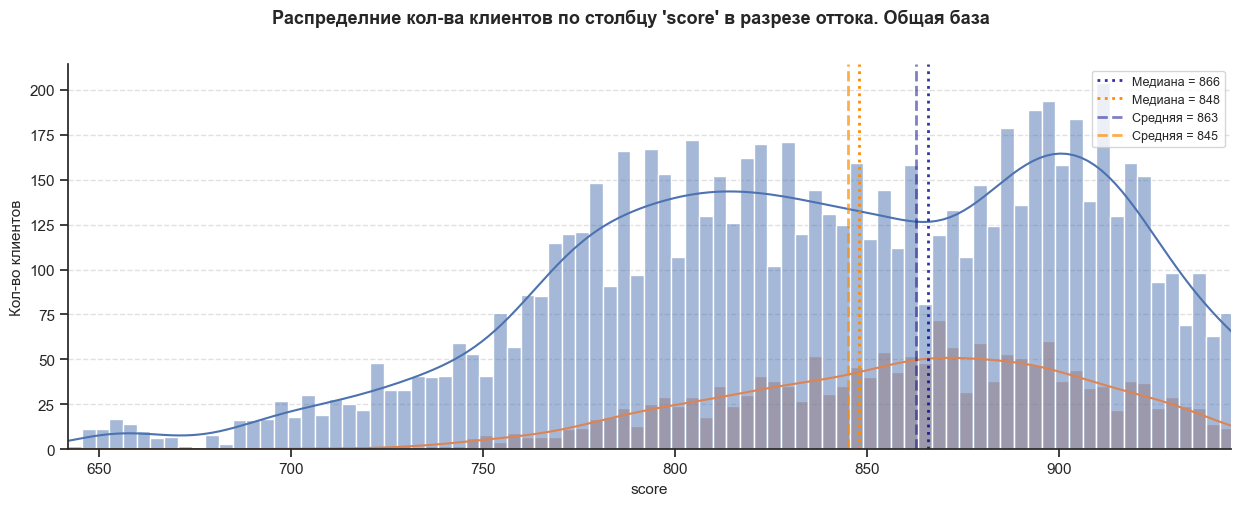

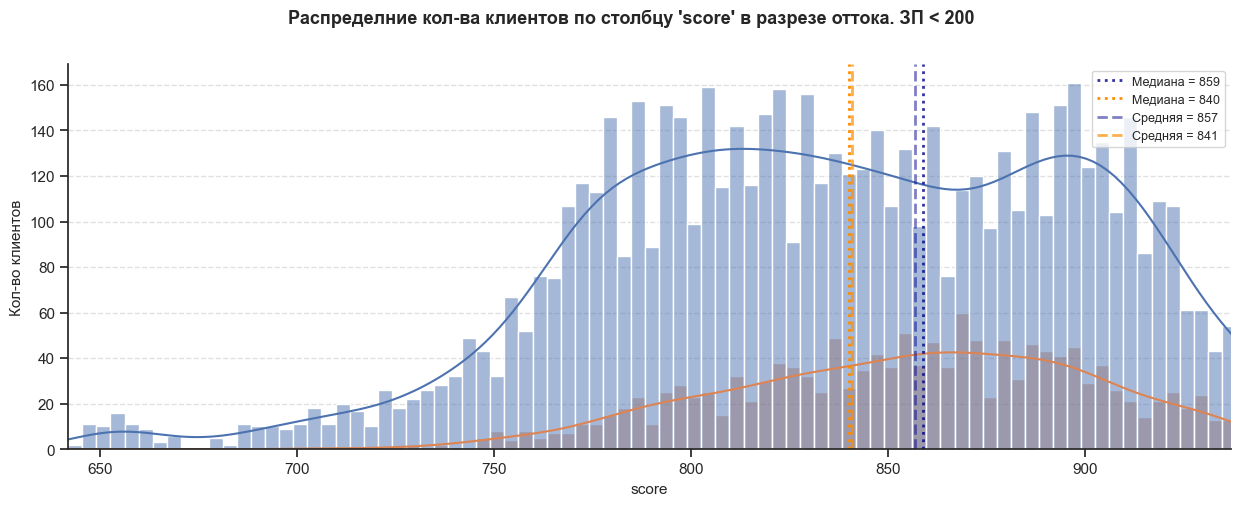

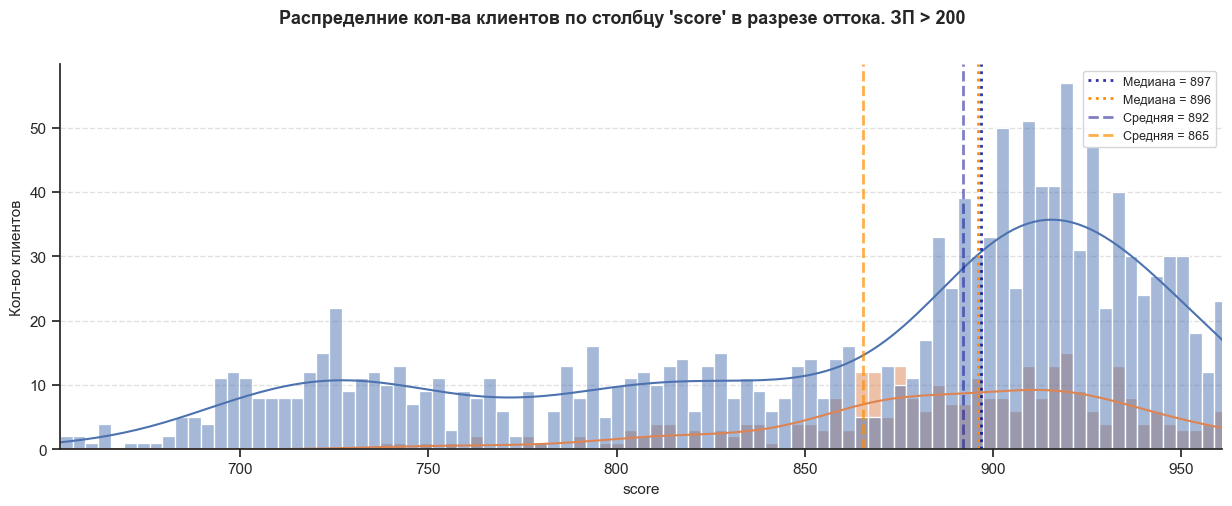

In [51]:
stat_function(filtered_df, 'score', 100, 'Общая база')
stat_function(below_200, 'score', 100, 'ЗП < 200')
stat_function(above_200, 'score', 100, 'ЗП > 200')

In [52]:
for data in [filtered_df, below_200, above_200]:
    print('Кол-во уходящих:', len(data.query('churn == 1')))
    print('Не уходящие:', len(data.query('churn == 0')))
    alpha = 0.05 

    results = st.ttest_ind(data.query('churn == 1')['score'], data.query('churn == 0')['score'])

    print('p-значение:', results.pvalue)

    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу, различия есть')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, различий нет')
    print()

Кол-во уходящих: 1807
Не уходящие: 8139
p-значение: 2.159707106644193e-25
Отвергаем нулевую гипотезу, различия есть

Кол-во уходящих: 1498
Не уходящие: 6723
p-значение: 1.3394671499306215e-19
Отвергаем нулевую гипотезу, различия есть

Кол-во уходящих: 309
Не уходящие: 1416
p-значение: 3.8727379315023e-08
Отвергаем нулевую гипотезу, различия есть



**Вывод:**

Во всех трёх случаях есть статистически значимые отличия между кредитным рейтингом уходящих и неуходящих клиентов. Везде уходящие клиенты обладают более низким средним рейтингом.


## Сегментирование клиентов

В этом разделе наша цель - найти сочетания признаков клиентов с наиболее высоким уровнем оттока `'churn'` и, исходя из этого, сформировать сегменты высокоотточных клиентов. 

По итогам исследовательского анализа мы выявили показатели некоторых признаков с повышенным оттоком. В группах с разными зарплатами они несколько отличались, но мы перечислим их подряд:
- `"products"` больше или равно 3;
- `"products"` больше или равно 2;
- `"equity"` больше или равно 3;
- `"equity"` больше или равно 4;
- кредитная карта отсутствует;
- `"balance"` в диапазоне от 1 до 4 млн рублей;
- возраст `"age"` в диапазоне от 20 до 35 лет;
- возраст `"age"` в диапазоне от 50 до 60 лет;
- кредитный рейтинг `"score"` в диапазоне от 830 до 900;
- кредитный рейтинг `"score"` в диапазоне от 830 до 930;

Кроме того, у нас есть два отдельных датасета с разным уровнем зарплат. Это добавит нашим поискам дополнительный разрез. 

___________________

Сформулируем условия в виде списка запросов:

In [53]:
queries = [
    '(products >= 3)',
    '(products >= 2)',
    '(equity >= 3)',
    '(equity >= 4)',
    '(score >= 830) and (score <= 900)',
    '(score >= 830) and (score <= 930)',
    '(age >= 20) and (age <= 35)',
    '(age >= 50) and (age <= 60)',
    '(balance >= 1000000) and (balance <= 4000000)',
    '(credit_card == 0)'
]

Нас интересуют разнообразные сочетания признаков. Запустим цикл, который по очереди сложит каждый запрос с каждым (за исключением самих себя):

In [54]:
queries_cross = []
for que in queries:    
    for q in range(len(queries)):
        try:
            if que != queries[q+1]:
                queries_cross.append(que + ' and ' + queries[q+1])
            else:
                pass
        except:
            pass

Создадим функцию, в которую будут передаваться датасет и список запросов для `.query()`

Результатом работы функции станет таблица вида:
- Индекс - конкретный запрос;
- `'churn_lvl'` - уровень оттока в датасете по этому запросу;
- `'total_count'` - количество клиентов по этому запросу;
- `'churn_count'` - количество уходящих клиентов по этому запросу (с `'churn' == 1`); 
- `'churn_lvl'` - уровень оттока клиентов, не вошедших в условия запроса;


In [55]:
def seg_func(data, queries):
    columns = ['churn_lvl', 'total_count', 'churn_count', 'churn_lvl_not']
    d = {columns[0]: [], columns[1]: [], columns[2]: []}
    table = pd.DataFrame(data=d)
    
    for i in range(len(queries)): #наполняем таблицу
        table.loc[queries[i], columns[0]] = round(data.query(queries[i])['churn'].mean(), 3)
        table.loc[queries[i], columns[1]] = len(data.query(queries[i]))
        table.loc[queries[i], columns[2]] = data.query(queries[i])['churn'].sum()
    
    table[columns[1]] = table[columns[1]].astype('int64')
    table[columns[2]] = table[columns[2]].astype('int64')
    
    for index in table.index: #считаем уровень оттока клиентов, не входящих в запрос
        ind = data.query(index).index
        table.loc[index, columns[3]] =  round(data.query('~(@data.index in @ind)')['churn'].mean(), 3)
    
    table = table.drop_duplicates(keep='first') #удаляем строки с дублирующимися запросами
        
    return table.sort_values(by='churn_lvl', ascending=False)

Функция готова. Передадим ей два датасета с разными зарплатами и список запросов:

In [56]:
segments_below_200 = seg_func(below_200, queries_cross)
segments_above_200 = seg_func(above_200, queries_cross)

In [57]:
display(segments_below_200.sample(3))
display(segments_above_200.sample(3))

churn_lvl  \
(products >= 3) and (balance >= 1000000) and (balance <= 4000000)      0.515   
(score >= 830) and (score <= 900) and (age >= 50) and (age <= 60)      0.344   
(products >= 3) and (credit_card == 0)                                 0.304   

                                                                   total_count  \
(products >= 3) and (balance >= 1000000) and (balance <= 4000000)          427   
(score >= 830) and (score <= 900) and (age >= 50) and (age <= 60)          616   
(products >= 3) and (credit_card == 0)                                     688   

                                                                   churn_count  \
(products >= 3) and (balance >= 1000000) and (balance <= 4000000)          220   
(score >= 830) and (score <= 900) and (age >= 50) and (age <= 60)          212   
(products >= 3) and (credit_card == 0)                                     209   

                                                                   churn_lvl_not  
(products >= 3) and (balance >= 1000000) and (balance <= 4000000)          0.164  
(score >= 830) and (score <= 900) and (age >= 50) and (age <= 60)          0.169  
(products >= 3) and (credit_card == 0)                                     0.171

churn_lvl  \
(score >= 830) and (score <= 930) and (age >= 50) and (age <= 60)      0.284   
(products >= 2) and (balance >= 1000000) and (balance <= 4000000)      0.520   
(products >= 3) and (balance >= 1000000) and (balance <= 4000000)      0.701   

                                                                   total_count  \
(score >= 830) and (score <= 930) and (age >= 50) and (age <= 60)          109   
(products >= 2) and (balance >= 1000000) and (balance <= 4000000)          358   
(products >= 3) and (balance >= 1000000) and (balance <= 4000000)          134   

                                                                   churn_count  \
(score >= 830) and (score <= 930) and (age >= 50) and (age <= 60)           31   
(products >= 2) and (balance >= 1000000) and (balance <= 4000000)          186   
(products >= 3) and (balance >= 1000000) and (balance <= 4000000)           94   

                                                                   churn_lvl_not  
(score >= 830) and (score <= 930) and (age >= 50) and (age <= 60)          0.172  
(products >= 2) and (balance >= 1000000) and (balance <= 4000000)          0.090  
(products >= 3) and (balance >= 1000000) and (balance <= 4000000)          0.135

Мы получили две таблицы со всеми возможными сочетаниями условий и уровнем оттока по каждому из них. 

Отфильтруем те строки, в которых уровень оттока равен 40% и выше, а общее кол-во клиентов в сегменте больше 350:

In [58]:
segments_below_200.query('(churn_lvl > 0.4) and (total_count > 350)')

churn_lvl  \
(products >= 3) and (balance >= 1000000) and (balance <= 4000000)                        0.515   
(age >= 50) and (age <= 60) and (balance >= 1000000) and (balance <= 4000000)            0.473   
(products >= 3) and (score >= 830) and (score <= 930)                                    0.435   
(score >= 830) and (score <= 930) and (balance >= 1000000) and (balance <= 4000000)      0.431   
(score >= 830) and (score <= 900) and (balance >= 1000000) and (balance <= 4000000)      0.425   
(products >= 3) and (equity >= 4)                                                        0.418   
(balance >= 1000000) and (balance <= 4000000) and (credit_card == 0)                     0.413   
(products >= 3) and (age >= 20) and (age <= 35)                                          0.411   

                                                                                     total_count  \
(products >= 3) and (balance >= 1000000) and (balance <= 4000000)                            427   
(age >= 50) and (age <= 60) and (balance >= 1000000) and (balance <= 4000000)                366   
(products >= 3) and (score >= 830) and (score <= 930)                                        680   
(score >= 830) and (score <= 930) and (balance >= 1000000) and (balance <= 4000000)          858   
(score >= 830) and (score <= 900) and (balance >= 1000000) and (balance <= 4000000)          563   
(products >= 3) and (equity >= 4)                                                            780   
(balance >= 1000000) and (balance <= 4000000) and (credit_card == 0)                         642   
(products >= 3) and (age >= 20) and (age <= 35)                                              418   

                                                                                     churn_count  \
(products >= 3) and (balance >= 1000000) and (balance <= 4000000)                            220   
(age >= 50) and (age <= 60) and (balance >= 1000000) and (balance <= 4000000)                173   
(products >= 3) and (score >= 830) and (score <= 930)                                        296   
(score >= 830) and (score <= 930) and (balance >= 1000000) and (balance <= 4000000)          370   
(score >= 830) and (score <= 900) and (balance >= 1000000) and (balance <= 4000000)          239   
(products >= 3) and (equity >= 4)                                                            326   
(balance >= 1000000) and (balance <= 4000000) and (credit_card == 0)                         265   
(products >= 3) and (age >= 20) and (age <= 35)                                              172   

                                                                                     churn_lvl_not  
(products >= 3) and (balance >= 1000000) and (balance <= 4000000)                            0.164  
(age >= 50) and (age <= 60) and (balance >= 1000000) and (balance <= 4000000)                0.169  
(products >= 3) and (score >= 830) and (score <= 930)                                        0.159  
(score >= 830) and (score <= 930) and (balance >= 1000000) and (balance <= 4000000)          0.153  
(score >= 830) and (score <= 900) and (balance >= 1000000) and (balance <= 4000000)          0.164  
(products >= 3) and (equity >= 4)                                                            0.158  
(balance >= 1000000) and (balance <= 4000000) and (credit_card == 0)                         0.163  
(products >= 3) and (age >= 20) and (age <= 35)                                              0.170

In [59]:
segments_above_200.query('(churn_lvl > 0.4) and (total_count > 350)')

churn_lvl  \
(products >= 2) and (balance >= 1000000) and (balance <= 4000000)      0.520   
(equity >= 3) and (balance >= 1000000) and (balance <= 4000000)        0.488   
(equity >= 3) and (score >= 830) and (score <= 930)                    0.464   
(products >= 2) and (equity >= 4)                                      0.443   
(products >= 2) and (equity >= 3)                                      0.426   
(equity >= 3) and (equity >= 4)                                        0.418   
(products >= 2) and (score >= 830) and (score <= 930)                  0.408   

                                                                   total_count  \
(products >= 2) and (balance >= 1000000) and (balance <= 4000000)          358   
(equity >= 3) and (balance >= 1000000) and (balance <= 4000000)            383   
(equity >= 3) and (score >= 830) and (score <= 930)                        427   
(products >= 2) and (equity >= 4)                                          481   
(products >= 2) and (equity >= 3)                                          596   
(equity >= 3) and (equity >= 4)                                            558   
(products >= 2) and (score >= 830) and (score <= 930)                      480   

                                                                   churn_count  \
(products >= 2) and (balance >= 1000000) and (balance <= 4000000)          186   
(equity >= 3) and (balance >= 1000000) and (balance <= 4000000)            187   
(equity >= 3) and (score >= 830) and (score <= 930)                        198   
(products >= 2) and (equity >= 4)                                          213   
(products >= 2) and (equity >= 3)                                          254   
(equity >= 3) and (equity >= 4)                                            233   
(products >= 2) and (score >= 830) and (score <= 930)                      196   

                                                                   churn_lvl_not  
(products >= 2) and (balance >= 1000000) and (balance <= 4000000)          0.090  
(equity >= 3) and (balance >= 1000000) and (balance <= 4000000)            0.091  
(equity >= 3) and (score >= 830) and (score <= 930)                        0.086  
(products >= 2) and (equity >= 4)                                          0.077  
(products >= 2) and (equity >= 3)                                          0.049  
(equity >= 3) and (equity >= 4)                                            0.065  
(products >= 2) and (score >= 830) and (score <= 930)                      0.091

В таблицах есть сегменты, которые:
- Логически пересекаются; 
- Слишком схожи;

Удалим их вручную, они нам ни к чему.

In [60]:
segments_below_200 = segments_below_200.query('(churn_lvl > 0.4) and (total_count > 350)').drop(
    labels = '(score >= 830) and (score <= 900) and (balance >= 1000000) and (balance <= 4000000)', axis = 0)

In [61]:
segments_above_200 = segments_above_200.query('(churn_lvl > 0.4) and (total_count > 350)').drop(
    labels = [
        '(equity >= 3) and (equity >= 4)',
        '(products >= 2) and (equity >= 4)'      
    ], axis = 0)

In [62]:
segments_below_200

churn_lvl  \
(products >= 3) and (balance >= 1000000) and (balance <= 4000000)                        0.515   
(age >= 50) and (age <= 60) and (balance >= 1000000) and (balance <= 4000000)            0.473   
(products >= 3) and (score >= 830) and (score <= 930)                                    0.435   
(score >= 830) and (score <= 930) and (balance >= 1000000) and (balance <= 4000000)      0.431   
(products >= 3) and (equity >= 4)                                                        0.418   
(balance >= 1000000) and (balance <= 4000000) and (credit_card == 0)                     0.413   
(products >= 3) and (age >= 20) and (age <= 35)                                          0.411   

                                                                                     total_count  \
(products >= 3) and (balance >= 1000000) and (balance <= 4000000)                            427   
(age >= 50) and (age <= 60) and (balance >= 1000000) and (balance <= 4000000)                366   
(products >= 3) and (score >= 830) and (score <= 930)                                        680   
(score >= 830) and (score <= 930) and (balance >= 1000000) and (balance <= 4000000)          858   
(products >= 3) and (equity >= 4)                                                            780   
(balance >= 1000000) and (balance <= 4000000) and (credit_card == 0)                         642   
(products >= 3) and (age >= 20) and (age <= 35)                                              418   

                                                                                     churn_count  \
(products >= 3) and (balance >= 1000000) and (balance <= 4000000)                            220   
(age >= 50) and (age <= 60) and (balance >= 1000000) and (balance <= 4000000)                173   
(products >= 3) and (score >= 830) and (score <= 930)                                        296   
(score >= 830) and (score <= 930) and (balance >= 1000000) and (balance <= 4000000)          370   
(products >= 3) and (equity >= 4)                                                            326   
(balance >= 1000000) and (balance <= 4000000) and (credit_card == 0)                         265   
(products >= 3) and (age >= 20) and (age <= 35)                                              172   

                                                                                     churn_lvl_not  
(products >= 3) and (balance >= 1000000) and (balance <= 4000000)                            0.164  
(age >= 50) and (age <= 60) and (balance >= 1000000) and (balance <= 4000000)                0.169  
(products >= 3) and (score >= 830) and (score <= 930)                                        0.159  
(score >= 830) and (score <= 930) and (balance >= 1000000) and (balance <= 4000000)          0.153  
(products >= 3) and (equity >= 4)                                                            0.158  
(balance >= 1000000) and (balance <= 4000000) and (credit_card == 0)                         0.163  
(products >= 3) and (age >= 20) and (age <= 35)                                              0.170

In [63]:
segments_above_200

churn_lvl  \
(products >= 2) and (balance >= 1000000) and (balance <= 4000000)      0.520   
(equity >= 3) and (balance >= 1000000) and (balance <= 4000000)        0.488   
(equity >= 3) and (score >= 830) and (score <= 930)                    0.464   
(products >= 2) and (equity >= 3)                                      0.426   
(products >= 2) and (score >= 830) and (score <= 930)                  0.408   

                                                                   total_count  \
(products >= 2) and (balance >= 1000000) and (balance <= 4000000)          358   
(equity >= 3) and (balance >= 1000000) and (balance <= 4000000)            383   
(equity >= 3) and (score >= 830) and (score <= 930)                        427   
(products >= 2) and (equity >= 3)                                          596   
(products >= 2) and (score >= 830) and (score <= 930)                      480   

                                                                   churn_count  \
(products >= 2) and (balance >= 1000000) and (balance <= 4000000)          186   
(equity >= 3) and (balance >= 1000000) and (balance <= 4000000)            187   
(equity >= 3) and (score >= 830) and (score <= 930)                        198   
(products >= 2) and (equity >= 3)                                          254   
(products >= 2) and (score >= 830) and (score <= 930)                      196   

                                                                   churn_lvl_not  
(products >= 2) and (balance >= 1000000) and (balance <= 4000000)          0.090  
(equity >= 3) and (balance >= 1000000) and (balance <= 4000000)            0.091  
(equity >= 3) and (score >= 830) and (score <= 930)                        0.086  
(products >= 2) and (equity >= 3)                                          0.049  
(products >= 2) and (score >= 830) and (score <= 930)                      0.091

Визуализируем полученные данные на круговых диаграммах:

In [64]:
def func(pct, temp):
    absolute = int(np.round(pct/100.*np.sum(temp), 1))
    return f"{pct:1.1f}%\n{absolute:d} чел."

def segm_graph(data):
    if len(data) == 5:
        fig, ax = plt.subplots(2,3, figsize=(15,8))
        fig.suptitle('Круговые диаграммы. Уровень оттока по сегментам. ЗП > 200 тыс.руб.', y=0.97, fontsize=13, weight='bold')
        for i in range(len(data)):
            if i <= 2:
                temp = [data.loc[data.index[i], 'churn_count'], data.loc[data.index[i], 'total_count'] - data.loc[data.index[i], 'churn_count']]
                ax[0, i].pie(temp, colors=['#e09b46', '#1a84bd'], explode=(0.05, 0), autopct=lambda pct: func(pct, temp));
                ax[0, i].set_title(data.index[i], fontsize = 8, color = 'Black')
                ax[0, i].legend(labels = ['У', 'НУ'], fontsize=9, loc='best')
            else:
                temp = [data.loc[data.index[i], 'churn_count'], data.loc[data.index[i], 'total_count'] - data.loc[data.index[i], 'churn_count']]
                ax[1, i-3].pie(temp, autopct=lambda pct: func(pct, temp), colors=['#e09b46', '#1a84bd'], explode=(0.05, 0));
                ax[1, i-3].set_title(data.index[i], fontsize = 8, color = 'Black')
                ax[1, i-3].legend(labels = ['У', 'НУ'], fontsize=9, loc='best')
        ax[1,2].set_axis_off()
    else:
        fig, ax = plt.subplots(3,3, figsize=(15,13))
        fig.suptitle('Круговые диаграммы. Уровень оттока по сегментам. ЗП < 200 тыс.руб.', y=0.94, fontsize=14, weight='bold')
        for i in range(len(data)):
            if i <= 2:
                temp = [data.loc[data.index[i], 'churn_count'], data.loc[data.index[i], 'total_count'] - data.loc[data.index[i], 'churn_count']]
                ax[0, i].pie(temp, autopct=lambda pct: func(pct, temp), colors=['#e09b46', '#1a84bd'], explode=(0.05, 0));
                ax[0, i].set_title(data.index[i], fontsize = 8, color = 'Black')
                ax[0, i].legend(labels = ['У', 'НУ'], fontsize=9, loc='best')
            if (2 < i) & (i < 6):
                temp = [data.loc[data.index[i], 'churn_count'], data.loc[data.index[i], 'total_count'] - data.loc[data.index[i], 'churn_count']]
                ax[1, i-3].pie(temp, autopct=lambda pct: func(pct, temp), colors=['#e09b46', '#1a84bd'], explode=(0.05, 0));
                ax[1, i-3].set_title(data.index[i], fontsize = 8, color = 'Black')
                ax[1, i-3].legend(labels = ['У', 'НУ'], fontsize=9, loc='best')
            if i >= 6:
                temp = [data.loc[data.index[i], 'churn_count'], data.loc[data.index[i], 'total_count'] - data.loc[data.index[i], 'churn_count']]
                ax[2, 0].pie(temp, autopct=lambda pct: func(pct, temp), colors=['#e09b46', '#1a84bd'], explode=(0.05, 0));
                ax[2, 0].set_title(data.index[i], fontsize = 8, color = 'Black')
                ax[2, 0].legend(labels = ['У', 'НУ'], fontsize=9, loc='best')
        ax[2,1].set_axis_off()
        ax[2,2].set_axis_off()

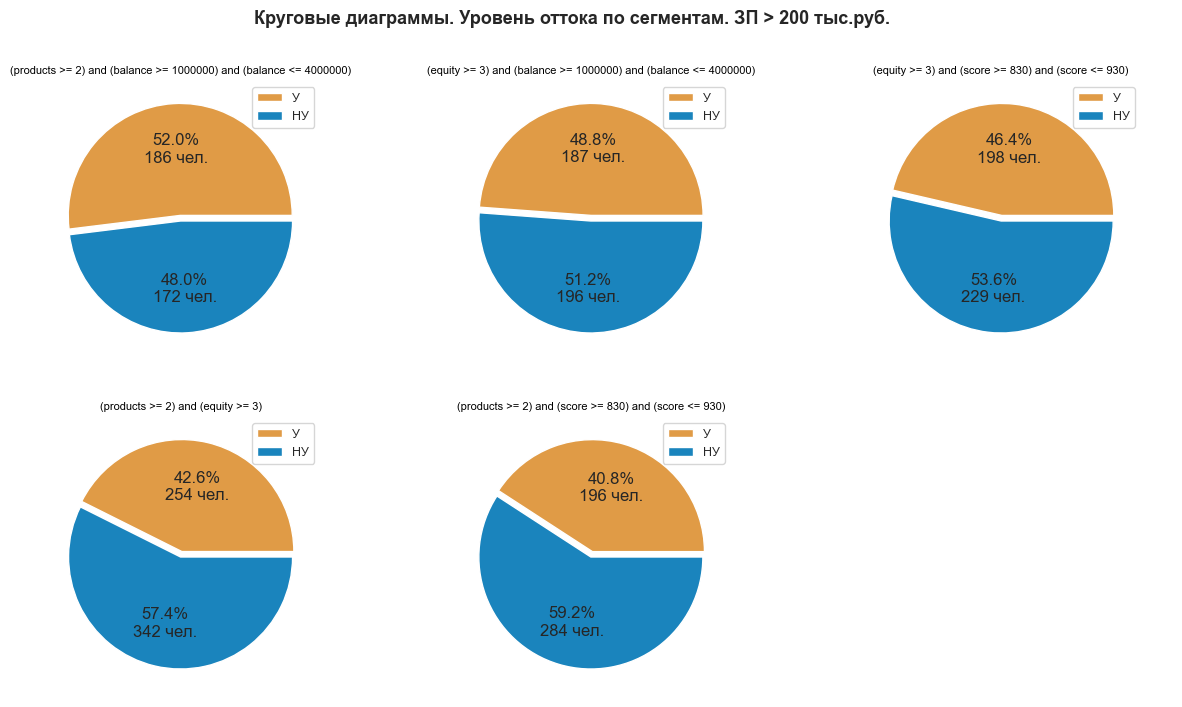

In [65]:
segm_graph(segments_above_200)

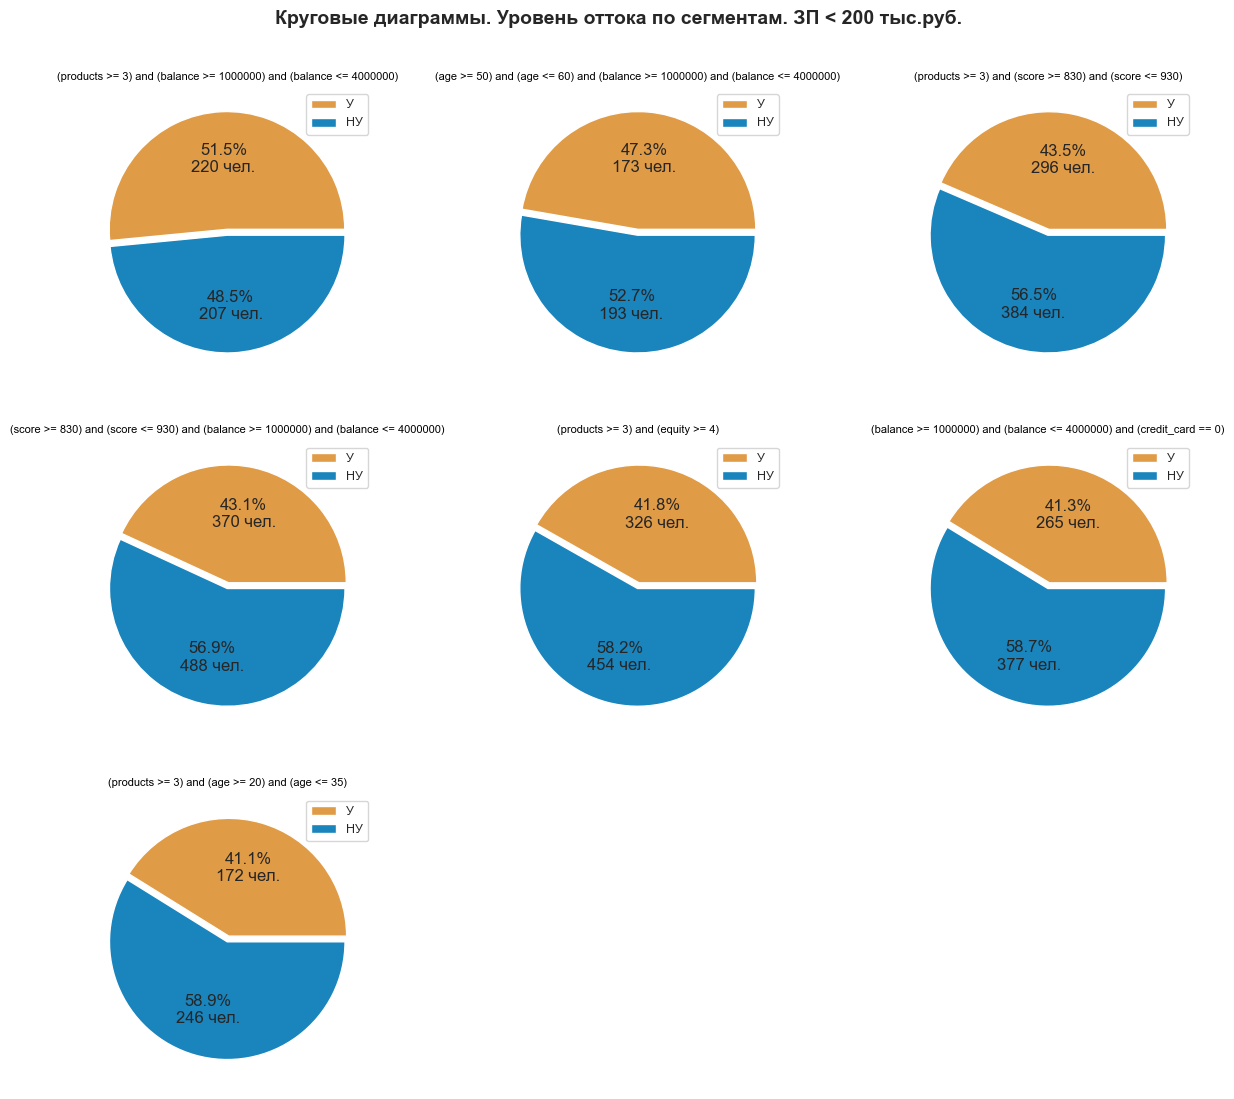

In [66]:
segm_graph(segments_below_200)

**Вывод по разделу:**

Мы получили перечень готовых сочетаний признаков с расчётом размера выборки и уровнем оттока клиентов. 

- Клиенты из двух таблиц не пересекаются. Они разделены по размеру зарплаты;
- Клиенты в рамках одной таблицы могут пересекаться в различных сочетаниях (за исключением возрастных срезов);
- Во всех сочетаниях выборка достаточного объёма, а уровень оттока выше 40%;
- Уровень оттока у клиентов, не входящих в указанные сегменты, ниже среднего. А у клиентов с ЗП выше 200 тыс. - ниже среднего минимум в 2 раза;

## Подведение итогов

Мы исследовали базу клиентов нашего банка и смогли получить признаки высокотточных клиентов. 

**Основа исследования:**

- Исследование проводилось на основе датасета с информацией о клиентах банка длиной в 10 000 строк;
- Результат предобработки и устранения аномалий: удалены 54 строки, суммарные потери - 0.54% от общей базы;

**Часть 1. Исследовательский анализ. Ключевые тезисы:**

- В ходе исследования были обнаружены некоторые различия в поведении клиентов с зарплатами до 200 тыс. руб. и выше 200 тыс.руб. Дальнейшее исследование признаков проводилось для двух групп в отдельности;
- У двух зарплатных групп в разных признаках отличается корреляция с фактом ухода. В группе ЗП > 200 тыс.р. связь признаков сильнее;

Признаки с повышенным оттоком у клиентов с ЗП < 200 тыс.р.:
- Кредитный рейтинг **от ~830 до 900 баллов**;
- Возраст **от 23 до 35 лет** и **от 50 до 60 лет**;
- Баланс **более ~1 млн рублей**;
- **3 и более** открытых продукта;
- **4 и более** баллов собственности;
- Отсутствие кредитной карты;

Признаки с повышенным оттоком у клиентов с ЗП > 200 тыс.р.:
- Кредитный рейтинг **от ~830 до 930 баллов**;
- Возраст **от 20 до 35 лет** и **от 50 до 60 лет**;
- Баланс **более ~1 млн рублей**;
- **2 и более** открытых продукта;
- **3 и более** баллов собственности;
- Отсутствие кредитной карты;


**Часть 2. Статистический анализ. Ключевые тезисы:**

Гипотеза о равенстве доходов:
- Без разделения на группы по зарплате статистически значимая разница между доходами уходящих и остающихся клиентов отсутствует;
- В группе с ЗП < 200 тыс. у отточных клиентов зарплата в среднем статистически ниже, чем у тех, кто остается. В группе с ЗП > 200 тыс. наоборот - отточные клиенты зарабатывают в среднем больше тех, кто остается. 

Гипотеза о равенстве кредитных рейтингов:
- С разделением на группы по зарплате или без - существуют статистически значимые отличия между кредитным рейтингом уходящих и неуходящих клиентов. Уходящие клиенты обладают более низким средним рейтингом.


**Часть 3. Сегментирование клиентов.**

Для двух зарплатных групп мы получили перечень готовых сочетаний признаков с расчётом размера выборки и уровнем оттока клиентов. Во всех достаточная выборка и уровень оттока более 40%.

### Рекомендации по сегментам

- **Клиенты с большим балансом** и **высоким баллом собственности** - разработка новых вкладов и инвестиционных продуктов для удержания клиента.
- **Клиенты от 20 до 35 лет** - разработка программ кэшбэка, новых дизайнов банковских карт.
- **Клиенты от 50 до 60 лет** - разработка новых вкладов, семейных опций.
- **Клиенты с 3-мя и более продуктами** - рассылка с предложением закрыть неиспользуемые продукты, карты.
- **Клиенты без кредитных карт** - льготные условия на получение кредитной карты. Факт получения карты резко понижает вероятность ухода.

### Презентация

Презентация: <https://drive.google.com/file/d/1IdL5lJo4uy_uj6oYzI7iVTk6xVPWjhYK/view?usp=sharing>